# Introduction and setup

This is a very simple code to simulate kinetic and thermodynamic features of a model describing the Fmoc-Cl rotatory motor. It solves the set of rate equations (1) in the notes and produces some plots.
The idea is to plug in it reasonable parameters in order to have a reasonable quantitative understanding of thedynamics and thermodynamcs of the experiment.

I tried to comment the code to clarify its logic, at least to explain what's plotted in the various figures. For any doubt, remark or request let's use the document in the Drive folder and the zoom meetings. 

To run a block, just click on it and press Ctrl+Enter. Note that usually a single block of code needs all the previous ones to be executed in order to work. Normally, you should be able to see all the outputs of my last running before the update in Binder.

# *Addenda* to the theory

Before starting with the numerical results, I quickly add two pieces of theory (and one speculation) which will prove useful to understand and evaluate the modeling.

## (coarse graining) -> to be updated

I just put here the final form of the coarse-grained reaction constants to plug in the model, I will add the detailed derivation in the notes, together with the thermodynamic explanation of why it is important to adopt a consistent coarse graining in building up the model. To obtain the constants, I simply applied the approach proposed in *New J. Phys.* **20** 042002 (2018). It is nothing more than a steady-state approximation in our case.

#### Wasting reaction:

By coarse-graining we pass from

$\mathrm{Fmoc-R} + \mathrm{NEt_3} \overbrace{\rightleftarrows}^{1} \mathrm{Fmoc-R}^- + \mathrm{HNEt_3}^+ \overbrace{\rightleftarrows}^{2} \mathrm{HO-R} + \mathrm{W} + \mathrm{NEt_3}$

to

$\mathrm{Fmoc-R} \rightleftarrows \mathrm{HO-R} + \mathrm{W}$

The resulting coarse-grained rates being:

- $k_\mathrm{-W}  = \frac{k_{-1} k_{-2}}{k_{+1} + k_{-2}} [\mathrm{NEt_3}]$
- $k_\mathrm{+W} = \frac{k_{+1} k_{+2}}{k_{+1} + k_{-2}} [\mathrm{NEt_3}]$

It can be shown that such rates give the correct contribution to the entropy production at the stationary state. The species $[W]$ in this case represent all the "waste" molecules produced, that are $\mathrm{CO_2}$ and $\mathrm{DBF}$. We could also consider them as dynamical variables -- same for $[\mathrm{NEt_3}]$ -- but it would be an overshoot for our purpuses, especially because $\mathrm{CO_2}$ continuosly leaves the system and its concentration is thus chemostatted to be very low.

#### Fueling reaction:

In the end, I think that the best way to describe what goes on in the system is not to use the coarse graining here, but the notion of "activated fuel". What I mean is to consider the reaction

$\mathrm{Fmoc-Cl} + \mathrm{(R)5} \overbrace{\rightleftarrows}^{1} \mathrm{Fmoc-(R)-5}^+\cdot\mathrm{Cl}^-$

to rapidly equilibrate on the time scale of the experiment, so that Fmoc-(R)5(+)$\cdot$Cl(-) directly enters the second equation as F:

$\mathrm{F} + \mathrm{HO-R} \overbrace{\rightleftarrows}^{2} \mathrm{Fmoc-R} + \mathrm{(R)5} + \mathrm{HCl}$

This is reasonable to do because it is actually F which reacts with the motor, and its concentration is pretty much well controlled by the continuous inflow of Fmoc-Cl into the system (which eventually saturates the catalyst, or anyway keeps its concentration approximately constant in time). The effective constants to use in the model then are:

- $k_\mathrm{+F} = k_{+2}$
- $k_\mathrm{-F} = k_{-2} [\mathrm{R(5)}] [\mathrm{HCl}]$ (concentrations which we can consider fixed in time during the autonomous operation or include as dynamical variables. As before, I think we don't need to consider their variation, especially since we are more interested in characterizing steady state properties. We can discuss about this.)

Also in this case, by adopting such a description, we guarantee thermodynamics to be consistent.

## thermodynamic simmetries and constraints

To discuss the effects of the various chemical modifications that can be introduced in the system, we need to generalize our model in order to take into account the different ways in which symmetry of the kinetic contants and states can be broken. Consider this scheme:


![image](images/scheme.png)


where the following simmetries hold in the reference experiment.

- $k_{+\Delta} = k_{-\Delta} = k'_{+\Delta} = k'_{-\Delta}$
- $k^\mathrm{h}_{+\mathrm{W}} = k_{+\mathrm{W}}$; $k^\mathrm{h}_{-\mathrm{W}} = k_{-\mathrm{W}}$

Thermodynamic constraints (Wegscheider's conditions) in equation (17) of the notes become:

- $k^\mathrm{h}_{-\mathrm{F}} k_{+\Delta} k_{+\mathrm{F}} k^\mathrm{h}_{-\mathrm{F}} k'_{+\Delta} k_{+\mathrm{F}} = k^\mathrm{h}_{+\mathrm{F}} k_{-\Delta} k_{-\mathrm{F}} k^\mathrm{h}_{+\mathrm{F}} k'_{-\Delta} k_{-\mathrm{F}}$
- $k^\mathrm{h}_{-\mathrm{W}} k_{+\Delta} k_{+\mathrm{W}} k^\mathrm{h}_{-\mathrm{W}} k'_{+\Delta} k_{+\mathrm{W}} = k^\mathrm{h}_{+\mathrm{W}} k_{-\Delta} k_{-\mathrm{W}} k^\mathrm{h}_{+\mathrm{W}} k'_{-\Delta} k_{-\mathrm{W}}$

Which are automatically fulfilled in the reference experiment as far as $\frac{k^\mathrm{h}_{-\mathrm{F}} k_{+\mathrm{F}}}{k^\mathrm{h}_{+\mathrm{F}}k_{-\mathrm{F}}} = 1$.

This tells us we can safely imagine to modify independently all the ratios between reactions' forward and backward constants, but also the absolute values of $k_{+\mathrm{W}} (= k^\mathrm{h}_{+\mathrm{W}})$, $k_{-\mathrm{W}} (= k^\mathrm{h}_{-\mathrm{W}})$, $k_{+\mathrm{F}}$, $k^\mathrm{h}_{+\mathrm{F}}$ and $k_{-\mathrm{F}}$.

Concerning the effect of breaking the symmetry in the shuttling constants, there are two possible scenarions:

#### S1 - Introducing differencies in the binding sites

We can image to modify the fumaramide residues on the larger ring in order to make yellow (H) and green (D) sites more or less energetically stable for the small ring. In doing so, the symmetry in the shuttling constants reduces to:

- $k_{+\Delta} = k'_{-\Delta}$; $k_{-\Delta} = k'_{+\Delta}$

Importantly, this modification does not affect thermodynamic constraints and the symmetry in the wasting constants can be independently preserved. This is because it is a modification which only affects the mechanical substates of the system independently of the chemical ones. 

#### S2 - Introducing non-steric interactions between the small ring and bulky groups

Another possibility is to modify the benzylic amide macrocycle and/or the Fmoc residue in order to introduce electronic attraction/repulsion between them. This will make mechanical states more or less stable **depending** on wheather the small ring is far or close to a bulky group. The symmetry in the shuttling constants will then reduce to:

- $k_{+\Delta} = k'_{+\Delta}$; $k_{-\Delta} = k'_{-\Delta}$

and by considering the general thermodynamic constraints written above, it is easy to realize that putting $k_{+\Delta} \neq k_{-\Delta}$ will now automatically make at least $k^\mathrm{h}_{+\mathrm{W}} \neq k_{+\mathrm{W}}$ (while we can still consider $k^\mathrm{h}_{-\mathrm{W}} = k_{-\mathrm{W}}$).

Importanly, in this second scenario an energy ratchet mechanism is introduced, since chemical degrees of freedom are modifing the energies (and no more only the barriers) of the mechanical degrees of freedom. In other words, energy is pushed into the mechanical degrees of freedom by the chemical ones, and not only information. The following thermodynamic argument will hopefully clarify this point.

#### Effect on themodynamics

With this generalization, the various contributions to the entropy production of the motor at the stationary state become:

$ 
\dot{\Sigma} = \overbrace{\underbrace{J_\mathrm{ss} R\log \frac{k_{+\Delta}k'_{+\Delta}}{k_{-\Delta}k'_{-\Delta}}}_{\dot{S}^\mathrm{mh}_\mathrm{r}} + \underbrace{J_\mathrm{ss} R\log \frac{[\mathrm{1^D_H}][\mathrm{1^H_D}]}{[\mathrm{1^D_D}][\mathrm{1^H_H}]}}_{\dot{I}}}^{\dot{\Sigma}^\mathrm{mh}} + \overbrace{\underbrace{\mathrm{I_F}\frac{(\mu_\mathrm{F} - \mu_\mathrm{W})}{T} + J_\mathrm{ss}R\log \frac{k_{-\Delta}k'_{-\Delta}}{k_{+\Delta}k'_{+\Delta}}}_{\dot{S}^\mathrm{ch}_\mathrm{r}} - \dot{I}}^{\dot{\Sigma}^\mathrm{ch}}
$

By focusing on the mechanical subsystem, $\dot{S}^\mathrm{mh}_\mathrm{r}$ is the footprint of energy ratchet, when free-energy is directly pumped into the mechanichal degrees of freedom together with information. We immediatly see that in case of scenario S1 no energy ratchet is possible, and all the consideration already in the notes do apply.

When we adopt scenario S2, the following situations may appear, thus defining different working regimes for the Fmoc-Cl rotatory motor.

- $\dot{S}^\mathrm{mh}_\mathrm{r} = 0$, no energy ratchet is there and the motor is purely information-driven. The interpretation of che chemical degrees of freedom as a Maxwell's demon holds.
- $\dot{S}^\mathrm{mh}_\mathrm{r} < 0$ and $\dot{I} > 0$, energy ratchet is present, but it generates a force pushing in the opposite direction with respect to the current. The motor is thus only driven by information, and part of it is being burn to do work against the the force coming from energy ratchet. Such a fine understanding of the energetics allows for the definition of varisous kind of thermodynamic efficiencies: $\frac{\dot{I}}{\dot{S}^\mathrm{ch}_\mathrm{r}}$ is the efficiency at which the chemical demod generates information; $\frac{|\dot{S}^\mathrm{mh}_\mathrm{r}|}{\dot{I}}$ is the efficiency at which information is converted into work; the product of the two aformentioned efficiencies can be taken as a measure for the global performance of the motor.

I would consider the above two situations as purerly information-driven regimes.

- $\dot{S}^\mathrm{mh}_\mathrm{r} > 0$ and $\dot{I} > 0$, energy- and information-ratchet are both present and push in the same direction, but they are two distinct mechanisms from the point of view of thermodynamics. I would call this situation a mixed or hybrid regime. In this case, the fueling work performed on the chemical degrees of freedom by the chemostats is allowing both the contribution to be positive, so the efficiency of the ratcheting is $\frac{\dot{I} + \dot{S}^\mathrm{mh}_\mathrm{r}}{\mathrm{I_F}(\mu_\mathrm{F} - \mu_\mathrm{W})}\cdot{\small T}$. The difference in magnitude between $\dot{I}$ and $\dot{S}^\mathrm{mh}_\mathrm{r}$ can be use to classify the regime as more energy- or more information-driven.


- $\dot{I} < 0$ and $\dot{S}^\mathrm{mh}_\mathrm{r} > 0$, here the interpretation of the chemical degrees of freedom as a Maxwell's demon falls because they are now the ones which are burning information, while it is being genearated at the level of the mechanical degrees of freedom. I would call this a purerly energy-ratchet mechanism. If the purpose of the motor remains that of generate a directional current across the mechanical substates, the efficiency of the energy ratchet mechanism reads $\frac{\dot{S}^\mathrm{mh}_\mathrm{r}}{\mathrm{I_F}(\mu_\mathrm{F} - \mu_\mathrm{W}) + \dot{I} \cdot T}\cdot{\small T}$, where the information flow becomes a "cost to pay".

Knowing in which regime the motor is working is crucial not only to understand the principles behind its functioning and the way it processes energy, but also to correctly compute its efficiency/ies.

## (bounds)

This is still work in progress, and I do not guarantee it will give us some insights. I put it here more as a personal note than something I really want to communicate now. The idea is to bound a dynamical quantity such as the current with a thermodynamic one as the entropy prodoction. The following bound can be proven

 $\frac{J_\mathrm{ss}}{k_{-\Delta} [1_\mathrm{c}]} \leq \frac{1}{2} \left( \exp(\frac{\dot{\Sigma_\mathrm{ss}^\mathrm{mh}}}{2 R k_{-\Delta} [\mathrm{1_c}]}) - 1 \right)$
 
that, when the exponent is small (linear regime) can be rewritten as

$J_\mathrm{ss} \leq \frac{\dot{\Sigma_\mathrm{ss}^\mathrm{mh}}}{4 R}$

which tells us the the sum of two thermodynamic quantities such as energy- and information- ratchet sets an upper limit to the current which may be generated in the motor: no ratchets, no current.

From a theoretical point of view this is interesting because lot of work is going on about "thermodynamic uncertainty relation" and "speed limits". Massimiliano recently prove a [universal bound](https://arxiv.org/abs/2002.03234) which the above one is reminiscent of. In any case, if of any interest, this kind of result better fits into the review than this work. The interest would be that of comparing different prototypes of molecular motors and see which one are intrinsically less limited than the others (which ones can in principle achive the same values of current with less dissipation). It would bring theoretical bounds into our infomation-thermodynamic picture, which are the third "useful thing" thermodynamics can tell us about (after energetics understanding and performance evaluation).

## Libraries, modules and physical constants

In the following two blocks I load what is needed to run the code and set the values of the physical constants.

In [1]:
%matplotlib inline 
#to generate figures directly in the notebook

# Libraries and Modules
import math 
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from numpy import *
from scipy.integrate import odeint
from scipy.optimize import *

print(mpl.__version__) #check of the matplotlib version

3.0.2


In [2]:
# Parameters and physical constants

h      = 6.62607004e-34   # [J*s]
kb     = 1.38064852e-23   # [J/K]
c      = 299792458        # [m/s]
Na     = 6.02214086e23    # [mol-1]
R      = kb*Na            # 8.314459865590527 [J/(mol*K)]
T      = 293              # [K]
    
C_kJ   = 4184 # 1kCal = 4184 J

print(R*T) #check


2436.1367406180243


# Parameters of the model

In the following block, kinetic constants are fixed to reproduce as best as possible the original experiment, where none of the simmetries discussed above is broken (see Plot 1 below).

First or coarse-grained first order kinetic constants (in parenthesis the respective variable names used in the code):
- $k_{+\Delta} \, (\mathrm{yc}) = k_{-\Delta} \, (\mathrm{gf}) = k'_{+\Delta} \, (\mathrm{gc}) = k'_{-\Delta} \, (\mathrm{yf}) = 10 \, s^{-1}$ based on the estimations we discussed.
- $k_{-\mathrm{W}} \, (\mathrm{wm}) = k^\mathrm{h}_{-\mathrm{W}} \, (\mathrm{um}) = 0.00003 \, s^{-1}$ based on the model study in the original paper (figure 2c) and considering the lower amount of Et$_3$N.
- $k_{-\mathrm{F}} \, (\mathrm{fm}) = 0.0000001 \, s^{-1}$; not a srong guess. We know it has to be smaller than $k_{-\mathrm{W}}$ and such that $\mu^\circ_\mathrm{F} - \mu^\circ_\mathrm{W} > 0$.
- the value of $k^\mathrm{h}_\mathrm{-F} \, (\mathrm{hm}) $ is calculated with eq. (18) in the notes, once the other parameters are set.

Second or coarse-grained second order kinetic constants:
- $k_{+\mathrm{F}} \, (\mathrm{fp}) = 0.008 \, s^{-1}M^{-1}$ chosen such that the rate of Fmoc attachment ($k_{+\mathrm{F}} \cdot  [\mathrm{F}]$) in the autonomous experiment is about 10 times larger than the Fmoc removal $k_{-\mathrm{W}} = k^\mathrm{h}_{-\mathrm{W}}$.
- $k^\mathrm{h}_{+\mathrm{F}} \, (\mathrm{hp}) = 0.002 \, s^{-1}M^{-1}$ chosen to be 4 times smaller than $k_{+\mathrm{F}}$
    based on the estimated 80:20 ratio in the frequency of reacting events. 
- $k_{+\mathrm{W}} \, (\mathrm{wp}) = k^\mathrm{h}_{+\mathrm{W}} \, (\mathrm{up}) = 0.000001 \, s^{-1}M^{-1}$; not a strong guess. We expect it to be very small and the actual values can be set such that $\mu^\circ_\mathrm{F} - \mu^\circ_\mathrm{W} > 0$.
    
Some useful quantities are then displayed:
- DGT is the free-energy difference btw $\mathrm{1^H_D}$ and $\mathrm{1^D_D}$, which of course is null as the
    shuttling constants are equal.
- muFmuW is $\mu^\circ_\mathrm{F} - \mu^\circ_\mathrm{W}$, which results to be about 35 kJ with the above
    choices. I think is reasonable, our considerations taken into account.
- Kr_std is the "ratcheting constant" as defined by Ragazzon and Prins, which is also a measure of the "kinetic
    asymmetry" *à la* Astumian. It will be useful for future considerations and connections with literature. In particular, there are cases in which different set of parameters lead to different current's value but have the same ratcheting constant, which thus is a good quantity to understand current's direction, but not its magnitude.

In [3]:
# First order rate constants [s-1]

yc = 10 
gf = 10 
gc = 10
yf = 10

wm = 0.00003
um = 0.00003
fm = 0.0000001

# Second order rate constants [(s*M)-1]

fp = 0.008 
hp = 0.002

wp = 0.000001

# Rate constants set by thermodynamic constraints
hm = sqrt((hp*fm*yf*hp*fm*gf)/(fp*gc*fp*yc))
up = sqrt((um*yc*wp*um*gc*wp)/(gf*wm*yf*wm))


print('yc   ', yc)
print('gf   ', gf)
print('gc   ', gc)
print('yf   ', yf)
print('fp   ', fp)
print('hp   ', hp)
print('wm   ', wm)
print('um   ', um)
print('fm   ', fm)
print('hm   ', hm)
print('wp   ', wp)
print('up   ', up)

#Chemical potentials differencies:

DGT = -R*T*log(yc/gf) #Std Chem Pot DD - DH
DGT = -R*T*log(gc/yf) #Std Chem Pot HH - HD

muFmuW = R*T*log((fp*wm)/(fm*wp)) #Std chemical potential gradient F-W

DGf = -R*T*log(fp/fm)
DGh = -R*T*log(hp/hm)
DGw = -R*T*log(wp/wm)

print('DGT   ',DGT) 
print('muFmuW    ', muFmuW)

### "standard" kinetic asymmetry
Kr_std  = ((hm+um)**2*yc*(fp+wp)**2*gc/((hp+up)**2*gf*(fm+wm)**2*yf))
print('Kr_std   ', Kr_std)

###  
#print(DGf,DGh,DGw)

### condizione su F per equilibrio

#W0 = 0.000001
#Feq = W0*exp(-muFmuW/(R*T))
#print(Feq)




yc    10
gf    10
gc    10
yf    10
fp    0.008
hp    0.002
wm    3e-05
um    3e-05
fm    1e-07
hm    2.5e-08
wp    1e-06
up    1e-06
DGT    -0.0
muFmuW     35789.234416983294
Kr_std    15.908433047262337


# Routines

Here the functions used in the code to solve systems of equations are defined. It's not important that you read them if you are not familiar with python. Anyway, nothing counterintuitive, except maybe my notation:
- $[\mathrm{2_H}] = $ PH,  $[\mathrm{2_D}] = $ PD,  $[\mathrm{1^D_H}] = $ DH, $[\mathrm{1_D^H}] = $ HD,  $[\mathrm{1^D_D}] = $ DD,  $[\mathrm{1^H_H}] = $ HH;
- $[\mathrm{F}] = $ F0, $[\mathrm{W}] = $ W0, $L_\mathrm{M} = $ LM

In [4]:
def SS_solution(ss,yc,gf,gc,yf,fp,fm,wp,wm,hp,hm,up,um,F0,W0,LM):
    """
    This function takes as input kinetic constants, chemostatted concentrations of F and W, and conserved
    quantity LM. The output is a 6-d array named "ss" containing the stationary state concentrations of the
    internal species.
    """
    
    PH  = ss[0]
    PD  = ss[1]
    DH  = ss[2]
    HD  = ss[3]
    DD  = ss[4]
    HH  = ss[5]
              
    #solo 3 delle 4 equazioni allo stato stazionario sono indipendenti, perché ho una legge di conservazione
              
    H = empty((6))
    H[0] = -(hm+um+fm+wm)*PH + (hp*F0+up*W0)*DH + (fp*F0 + wp*W0)*HH  #PH
    H[1] = -(hm+um+fm+wm)*PD + (hp*F0+up*W0)*HD + (fp*F0 + wp*W0)*DD #PD
    H[2] = -(hp*F0+up*W0+yc)*DH + (hm+um)*PH + gf*DD  #DH
    H[3] = -(hp*F0+up*W0+gc)*HD + (hm+um)*PD + yf*HH  #HD
    H[4] = -(fp*F0+wp*W0+gf)*DD + (fm+wm)*PD + yc*DH  #DD
    H[5] = (PH + PD + DH + HD + DD + HH) - LM #conservation of motor
    return H

## The routine for equilibrium is not strictly needed at the moment
#def EQ_solution(eq,sp,sm,fp,fm,wp,wm,hp,hm,W0,LM):
#    """
#    This function takes as input kinetic constants, chemostatted concentration of W (taken as reference to define
#    the equilibrium distribution), and conserved quantity LM. The output is a 7-d array named "eq" containing the 
#    equilibrium concentrations of the internal species and F given [W] = W0.
#    """
#
#    EPH  = eq[0]
#    EPD  = eq[1]
#    EDH  = eq[2]
#    EHD  = eq[3]
#    EDD  = eq[4]
#    EHH  = eq[5]
#    EF   = eq[6]
#
#    G = empty((7))
#    G[0] =  sp*EDH - sm*EDD #switching 
#    G[1] =  sm*EHD - sp*EHH  #switching
#    G[2] =  fm*EPD - fp*EF*EDD  #fueling
#    G[3] =  wm*EPD - wp*W0*EDD  #wasting
#    G[4] =  fm*EPH - fp*EF*EHH #fueling
#    G[5] =  wm*EPH - wp*W0*EHH #wasting
#    G[6] =  (EPH + EPD + EDH + EHD + EDD + EHH) - LM #conservation of motor
#    return G

def DY_solution(y, t, params):
    """
    This function takes as input kinetic constants, chemostatted concentration of F and W, and conserved quantity 
    LM. The output is the list of rate equations (eq. (1) in the notes) of the kind dy[i]/dt = derivs[i] to
    solve numerically with scipy odeint in order to get the time evolution of concentrations from a certain 
    initial condition up tu a certain time. The conservation of the total amount of motor is "built-in" in writing
    HH as LM minus the sum of all other concentrations.
    """
    PH,PD,DH,HD,DD = y
    yc,gf,gc,yf,fp,fm,wp,wm,hp,hm,up,um,F0,W0,LM = params
    derivs = [-(hm+um+fm+wm)*PH + (hp*F0+up*W0)*DH + (fp*F0 + wp*W0)*(LM - PH -PD -DH - HD -DD), #PH
              -(hm+um+fm+wm)*PD + (hp*F0+up*W0)*HD + (fp*F0 + wp*W0)*DD, #PD
              -(hp*F0+up*W0+yc)*DH + (hm+um)*PH + gf*DD, #DH
              -(hp*F0+up*W0+gc)*HD + (hm+um)*PD + yf*(LM - PH -PD -DH - HD -DD), #HD
              -(fp*F0+wp*W0+gf)*DD + (fm+wm)*PD + yc*DH] #DD
    return derivs

# Dynamics (comparison with the experiment)

In the following blocks a simulation of the autonomous operation of Fmoc-Cl rotatory motor is performed. The idea is to reproduce the experiment in figure 4 of the paper to get a clue on how much our model is reliable.
By playing with the above parameters and looking at their effect on the plot below we can get the model as close as possible to the experiment, but also realize how much we can trust it qualitatively. I would be satisfied if the time scales of the processes and the concentration distributions have the correct order of magnitude.

Concentrations:
- $[F] = 0.03 M$ (chemostatted) chosen to be less, but of the same orfer of magnitude of R-(5) catalysts one. 
- $[W] = 0.00001 M$ (chemostatted) chosen to be small and not to interfere.
- $L_\mathrm{M} = 0.01 M$ (conserved) total amount of motor in solution

Initial condition:
- $[\mathrm{2_H}] = 0.008 M$ and $[\mathrm{2_D}] = 0.002 M$ as in figure 4. 



In [5]:
#Driving Experiment

#Concentrations
F0 = 0.03; W0 = 0.00001  ; LM = 0.01

#Pnitial conditions [PH, PD, DH, HD, DD]
y0 = [0.008,0.002,0.0,0.0,0.0]

#Parameters for the ODE-integrator
params= [yc,gf,gc,yf,fp,fm,wp,wm,hp,hm,up,um,F0,W0,LM]
tInit = 0.001 #starting time. 0 not possible for numerical reasons, but our fastest time scale is 0.1 s
tFinal = 150000 #total time of the simulation [s]
t = np.geomspace(tInit, tFinal, num=1000) #array of discrete times (1000) at which simulation is performed
th = t/3600 #same time array in hours

# Call the ODE solver and collection of the data
Ct = np.array(odeint(DY_solution, y0, t, args=(params,)))
#Ct = np.append(Ct, [(LM - sum([Ct[i,k] for k in range(0,5)])) for i in range(0,len(t))],axis=0)


Cdy = np.array([Ct[:,0],Ct[:,1],Ct[:,2],Ct[:,3],Ct[:,4],
                [(LM - sum([Ct[i,j]for j in range(0,5)])) for i in range(0,len(t))]])

#Cdy is an "array of array": each element is a 1000-long array representing the time evolutio of a species.
#The ordering is 0=PH, 1=PD, 2=DH, 3=HD, 4=DD, 5=HH.
# e.g.: Cdy[2] is the array collecting the time evolution of DH from tInit to tFinal

### Plot 1a: time evolution of concentrations

Time evolution of the consentration of all the species.
The stationary state is reached in ~30h.
At this scale the differencies between unprotected species are not discernable.

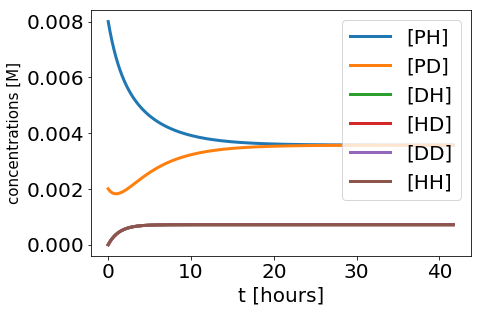

In [6]:
concentrations, ax1 = plt.subplots(1)
concentrations.tight_layout()
ax1.plot(th, Cdy[0], linewidth=3.0, label='[PH]')
ax1.plot(th, Cdy[1], linewidth=3.0, label='[PD]')
ax1.plot(th, Cdy[2], linewidth=3.0, label='[DH]')
ax1.plot(th, Cdy[3], linewidth=3.0, label='[HD]')
ax1.plot(th, Cdy[4], linewidth=3.0, label='[DD]')
ax1.plot(th, Cdy[5], linewidth=3.0, label='[HH]')
ax1.tick_params('y', labelsize=20)
ax1.tick_params('x', labelsize=20)
#ax1.axvline(x=4.5, linewidth=3.0, color='0.75', linestyle='-.')
ax1.legend(loc=0, prop={'size': 20})

ax1.set_xlabel('t [hours]', size=20)
ax1.set_ylabel('concentrations [M]', size=15)



#concentrations.savefig('../images/Chem_energy-driv_concentrations', dpi=300)


plt.show()

### Plot 1b: zoom on the last 30h, where steady state is approached

The signatures of the asymmetry in the initial condition start to vanish after ~30h, when the expected steady state (DH=HD and DD=HH) is reached.
At the stationary state, the difference between DH and DD is very small (order of 10-9 M, which implies a steady state current order of 10-8 M/s).

More precise steady state properties are displayed in the following.


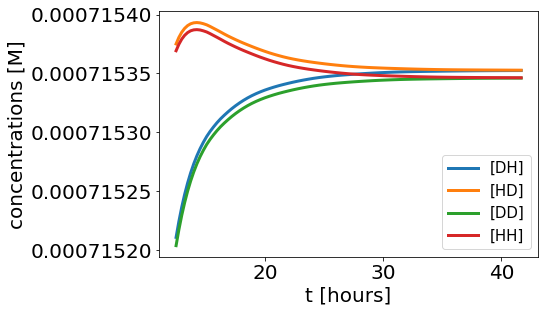

(DH - DD)ss =    6.425829330767262e-09


In [7]:
concentrations, ax1 = plt.subplots(1)
concentrations.tight_layout()
#ax1.plot(th, Cdy[0], linewidth=3.0, label='[PH]')
#ax1.plot(th, Cdy[1], linewidth=3.0, label='[PD]')
ax1.plot(th[935:], Cdy[2][935:], linewidth=3.0, label='[DH]')
ax1.plot(th[935:], Cdy[3][935:], linewidth=3.0, label='[HD]')
ax1.plot(th[935:], Cdy[4][935:], linewidth=3.0, label='[DD]')
ax1.plot(th[935:], Cdy[5][935:], linewidth=3.0, label='[HH]')
#ax1.set_xscale('log')
#ax1.set_yscale('log')

ax1.tick_params('y', labelsize=20)
ax1.tick_params('x', labelsize=20)
#ax1.axvline(x=4.5, linewidth=3.0, color='0.75', linestyle='-.')
ax1.legend(loc=0, prop={'size': 15})

ax1.set_xlabel('t [hours]', size=20)
ax1.set_ylabel('concentrations [M]', size=20)



#concentrations.savefig('../images/Chem_energy-driv_concentrations', dpi=300)

plt.show()

print('(DH - DD)ss =   ', Cdy[2][999]-Cdy[4][999])

# Steady state properties and thermodynamics

In the following, we focus on the system's stationary state, which is the most interesting one to characterize in terms of thermodynamics and performance on varying of various parameters.

The idea is that, if we trust the model based on the theory and the above results, we can use it to get information on how certain modifications of the parameters are expected to modify the behaviour of the motor.



## Scenario 1: Varyng of $k_{+\Delta} = k'_{-\Delta}$ and ratio $\frac{k_{+\Delta}}{k_{-\Delta}} = \frac{k'_{-\Delta}}{k'_{+\Delta}}$

- no energy ratchet introduced
- same definition of efficiency as in the notes
- kinetic asymmetry in not affected (current always clockwise)

To explore this scenario two set of 2D-plots are produced, one to study changes in the current and one for the efficiency of the motor. In both cases the absolute value of $k_{+\Delta} \, (\mathrm{yc})$ is on the x-coordinate, while the ratio r on the y-coordinate. The 4 plots in each set differ for the value of $[\mathrm{F}]$.

The blue dotted lines show experimental conditions.

![image](images/scheme_S1.png)

In [8]:
#definition of lists (where to collect data)
SLP = []; Ratio = [];
FUELINGJ = []; FUELINGEff = []; FUEL = []; INFOFLOW = [];
AFF = []; PH = []; PD = []; DH = []; HD = []; DD = []; HH = [];
Jf = [] ;Jw  = []; Jh  = []; Ju = []; IW = []; IF = [];
PHe = []; PDe = []; DHe = []; HDe = []; DDe = []; HHe = []; Fe = [];

#Conditions
W0 = 0.00001  ; LM = 0.01

#guess arrays for SS_solution and EQ (needed to initialize the equations solvers)
ssGuess = array([0.0001,0.0001,0.001,0.001,0.001,0.001]); 
#eqGuess = np.array([0.0000001,0.0000001,0.0025,0.0025,0.0025,0.0025, 0.000000000001])


#setting of parameters range (for a np.geomspace, where numbers are spaced evenly on log scale)
sp_min = 1e-4; sp_max = 1e2; 
rt_min = 1e-3; rt_max = 1e3;
num = 100;

#loop on the parameters: for each combination of parameters, corresponding steady-state properties are computed
for F0 in [0.003, 0.03, 0.3, 3]:
    Eff = []; Jt = []; Imh = []; FUEL.append(F0) #lits to renew on each cycles and collection of fuel values
    for ylc in np.geomspace(sp_min,sp_max,num):
        for r in np.geomspace(rt_min,rt_max,num):
            
            ylf = ylc
            glf = ylc/r #sm defined accordingly o r and sp in the loop
            glc = glf
            wlm = wm 
            ulm = um 
            flm = fm 
            flp = fp 
            hlp = hp 
            wlp = wp
            hlm = sqrt((hlp*flm*ylf*hlp*flm*glf)/(flp*glc*flp*ylc))
            ulp = sqrt((ulm*ylc*wlp*ulm*glc*wlp)/(glf*wlm*ylf*wlm))

            
            #call of the routines to solve rate equations
            ss = fsolve(SS_solution,ssGuess,args=(ylc,glf,glc,ylf,flp,flm,wlp,wlm,hlp,hlm,ulp,ulm,F0,W0,LM))
            ssGuess = array([ss[0],ss[1],ss[2],ss[3],ss[4],ss[5]]) 
#            eq = fsolve(EQ_solution,eqGuess,args=(slp,slm,fp,fm,wp,wm,hp,hm,W0,LM))
#            eqGuess = np.array([eq[0], eq[1], eq[2], eq[3], eq[4],eq[5],eq[6]])
            
            #affinity/force
            aff = R*T*log((flp*wlm)/(flm*wlp)) + R*T*(log(F0) - log(W0))
            
            #currents
            jss = ylc*ss[2] - glf*ss[4]
            Jt.append(jss)
            ifuel = F0*(flp*ss[4] + flp*ss[5] + hlp*ss[2] + hlp*ss[3]) - (flm+hlm)*(ss[1] + ss[0])
            
            #work
            wch = ifuel*aff
            
            #info
            imh = jss*log((ss[2]*ss[3])/(ss[4]*ss[5]))
            Imh.append(imh)
            
            #efficiency
            ncd = R*T*imh/wch
            Eff.append(ncd)
            
    FUELINGJ.append(np.array(Jt))
    FUELINGEff.append(np.array(Eff))
    INFOFLOW.append(np.array(Imh))


/home/emanuele/venv_research/lib/python3.6/site-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


### Effect on the current $J_\mathrm{ss}$

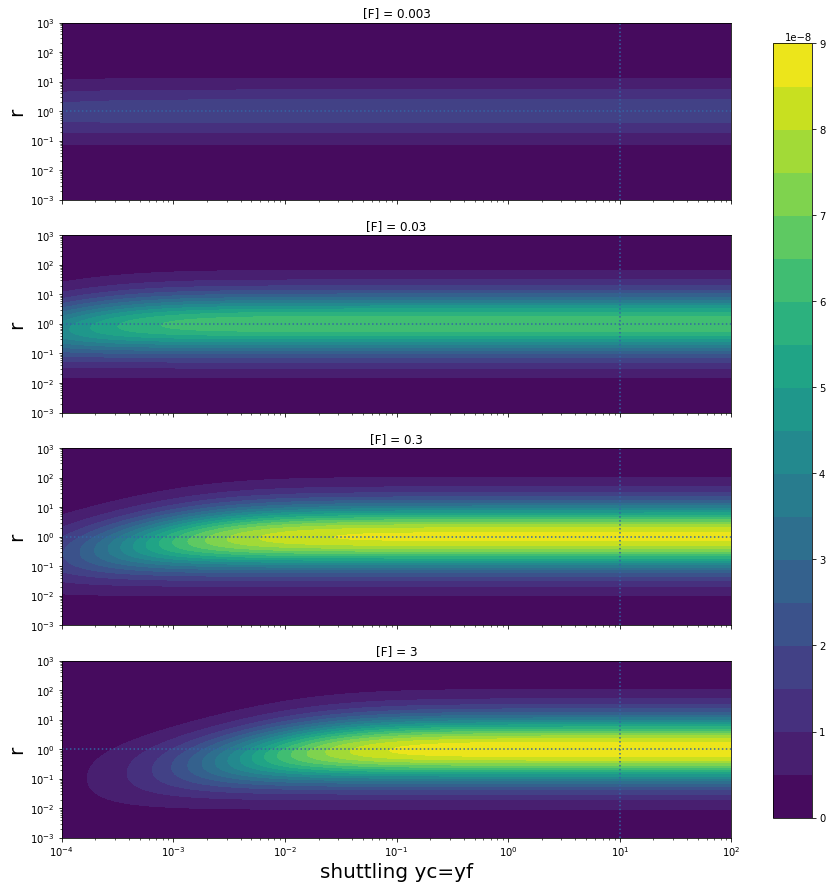

In [9]:
x=np.unique(np.geomspace(sp_min,sp_max,num))
y=np.unique(np.geomspace(rt_min,rt_max,num))

a = len(FUELINGJ)
shuttlingJ, axS = plt.subplots(a,1, figsize=(15,15), sharex=True)

im = axS[a-1].contourf(x,y,np.array(FUELINGJ[a-1]).reshape(len(y),len(x),order='F'),20)
axS[a-1].set_xlabel('shuttling yc=yf', size=20)
for i in range(0,(a-1)):
    axS[i].contourf(x,y,np.array(FUELINGJ[i]).reshape(len(y),len(x),order='F'),im.levels)

[axS[j].set_xscale('log') for j in range(0,a)]
[axS[j].set_yscale('log') for j in range(0,a)]
[axS[j].set_ylabel('r', size=20) for j in range(0,a)]
[axS[j].set_title('[F] = %s'%FUEL[j])  for j in range(0,a)]
[axS[j].axhline(y=1, c='#3465A4', linestyle=':') for j in range(0,a)]
[axS[j].axvline(x=10, c='#3465A4', linestyle=':') for j in range(0,a)]


shuttlingJ.colorbar(im, ax=axS.ravel().tolist(), shrink=0.95)

#plt.savefig('../papero/images/Fig3/etaSA_tmp', dpi=300)

plt.show()

### Effect on the efficiency

The yellow dotted line shows which value of r maximixes the efficiency given a certain yc.
The orange solid line shows which value of r maximizes $J_\mathrm{ss}$ (power) given a certain yc.
Ideally, one can use plots like these to find good trade-offs, where both the current and the efficiency are significantly high.

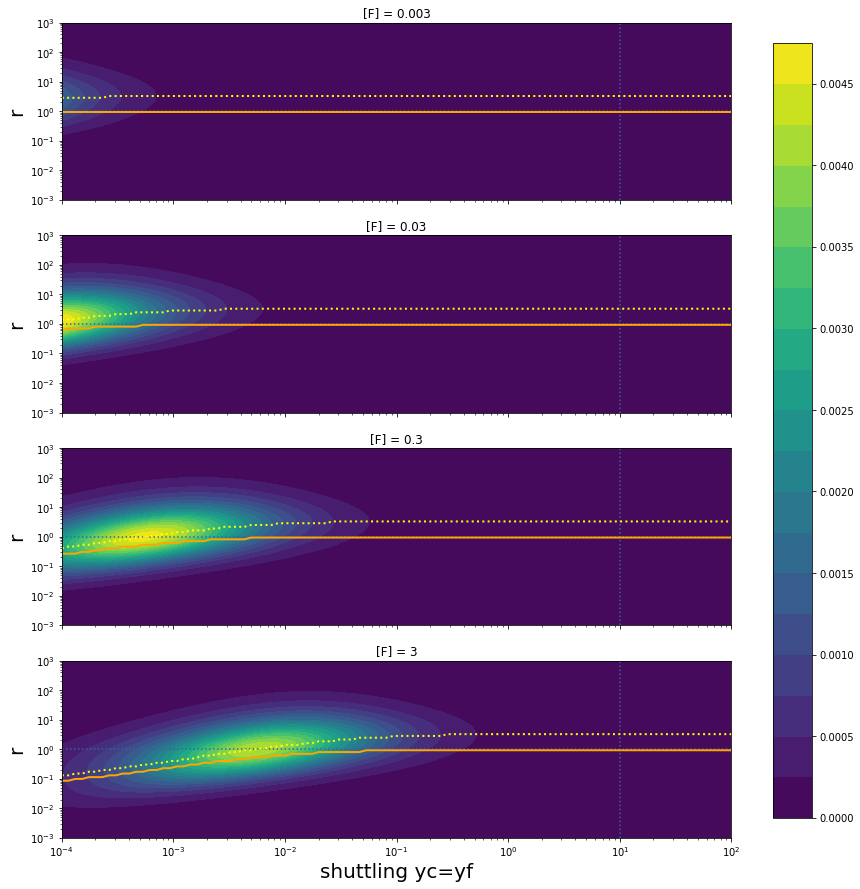

In [10]:
x=np.unique(np.geomspace(sp_min,sp_max,num))
y=np.unique(np.geomspace(rt_min,rt_max,num))

shuttlingEff, axSE = plt.subplots(a,1, figsize=(15,15), sharex=True)

im = axSE[2].contourf(x,y,np.array(FUELINGEff[2]).reshape(len(y),len(x),order='F'),20)
axSE[0].contourf(x,y,np.array(FUELINGEff[0]).reshape(len(y),len(x),order='F'),im.levels)
axSE[1].contourf(x,y,np.array(FUELINGEff[1]).reshape(len(y),len(x),order='F'),im.levels)
axSE[3].contourf(x,y,np.array(FUELINGEff[3]).reshape(len(y),len(x),order='F'),im.levels)
axSE[3].set_xlabel('shuttling yc=yf', size=20)

[axSE[j].set_xscale('log') for j in range(0,a)]
[axSE[j].set_yscale('log') for j in range(0,a)]
[axSE[j].set_ylabel('r', size=20) for j in range(0,a)]
[axSE[j].set_title('[F] = %s'%FUEL[j])  for j in range(0,a)]
[axSE[j].axhline(y=1, c='#3465A4', linestyle=':') for j in range(0,a)]
[axSE[j].axvline(x=10, c='#3465A4', linestyle=':') for j in range(0,a)]

shuttlingEff.colorbar(im, ax=axSE.ravel().tolist(), shrink=0.95)

#plt.axvline(x=6, c='#3465A4', linestyle=':')
#asS[2].set_xscale('log')

#### ADD THE LINE WHICH MAXIMIZES SOME FUNCTION
for i in range(0,a):
    FUNCTION = np.array(FUELINGJ[i]).reshape(len(y),len(x),order='F')
    qfwfq = np.argmax(FUNCTION,axis=0)
    t_0 = []
    for j in range(0,len(qfwfq)):
        t_0.append(y[qfwfq[j]])
    axSE[i].plot(x,t_0,c='orange',linewidth='2')
####

#### ADD THE LINE WHICH MAXIMIZES SOME FUNCTION
for i in range(0,a):
    FUNCTION = np.array(FUELINGEff[i]).reshape(len(y),len(x),order='F')
    qfwfq = np.argmax(FUNCTION,axis=0)
    t_0 = []
    for j in range(0,len(qfwfq)):
        t_0.append(y[qfwfq[j]])
    axSE[i].plot(x,t_0,c='yellow',linewidth='2', linestyle=':')
####


#plt.savefig('../papero/images/Fig3/etaSA_tmp', dpi=300)

plt.show()

## plot of the efficiency as dependent on yc and $[F]$, keeping the ratio constant 

In [11]:
#definition of lists (where to collect data)
SLP = []; Ratio = [];
FUELINGJ = []; FUELINGEff = []; RATIO = []; INFOFLOW = [];
AFF = []; PH = []; PD = []; DH = []; HD = []; DD = []; HH = [];
Jf = [] ;Jw  = []; Jh  = []; Ju = []; IW = []; IF = [];
PHe = []; PDe = []; DHe = []; HDe = []; DDe = []; HHe = []; Fe = [];

#Conditions
W0 = 0.00001  ; LM = 0.01

#guess arrays for SS_solution and EQ (needed to initialize the equations solvers)
ssGuess = array([0.0001,0.0001,0.001,0.001,0.001,0.001]); 
#eqGuess = np.array([0.0000001,0.0000001,0.0025,0.0025,0.0025,0.0025, 0.000000000001])


#setting of parameters range (for a np.geomspace, where numbers are spaced evenly on log scale)
F0_min = 0.0001; F0_max = 10;
F_min = 1e-4; sp_max = 1e2; 
num = 100;

#loop on the parameters: for each combination of parameters, corresponding steady-state properties are computed
for r in [0.1, 1, 10]:
    Eff = []; Jt = []; Imh = []; RATIO.append(r) #lits to renew on each cycles and collection of fuel values
    for F0 in np.geomspace(F0_min,F0_max,num):
        for ylc in np.geomspace(sp_min,sp_max,num):
            
            ylf = ylc
            glf = ylc/r #sm defined accordingly o r and sp in the loop
            glc = glf
            wlm = wm 
            ulm = um 
            flm = fm 
            flp = fp 
            hlp = hp 
            wlp = wp
            hlm = sqrt((hlp*flm*ylf*hlp*flm*glf)/(flp*glc*flp*ylc))
            ulp = sqrt((ulm*ylc*wlp*ulm*glc*wlp)/(glf*wlm*ylf*wlm))

            
            #call of the routines to solve rate equations
            ss = fsolve(SS_solution,ssGuess,args=(ylc,glf,glc,ylf,flp,flm,wlp,wlm,hlp,hlm,ulp,ulm,F0,W0,LM))
            ssGuess = array([ss[0],ss[1],ss[2],ss[3],ss[4],ss[5]]) 
#            eq = fsolve(EQ_solution,eqGuess,args=(slp,slm,fp,fm,wp,wm,hp,hm,W0,LM))
#            eqGuess = np.array([eq[0], eq[1], eq[2], eq[3], eq[4],eq[5],eq[6]])
            
            #affinity/force
            aff = R*T*log((flp*wlm)/(flm*wlp)) + R*T*(log(F0) - log(W0))
            
            #currents
            jss = ylc*ss[2] - glf*ss[4]
            Jt.append(jss)
            ifuel = F0*(flp*ss[4] + flp*ss[5] + hlp*ss[2] + hlp*ss[3]) - (flm+hlm)*(ss[1] + ss[0])
            
            #work
            wch = ifuel*aff
            
            #info
            imh = jss*log((ss[2]*ss[3])/(ss[4]*ss[5]))
            Imh.append(imh)
            
            #efficiency
            ncd = R*T*imh/wch
            Eff.append(ncd)
            
    FUELINGJ.append(np.array(Jt))
    FUELINGEff.append(np.array(Eff))
    INFOFLOW.append(np.array(Imh))


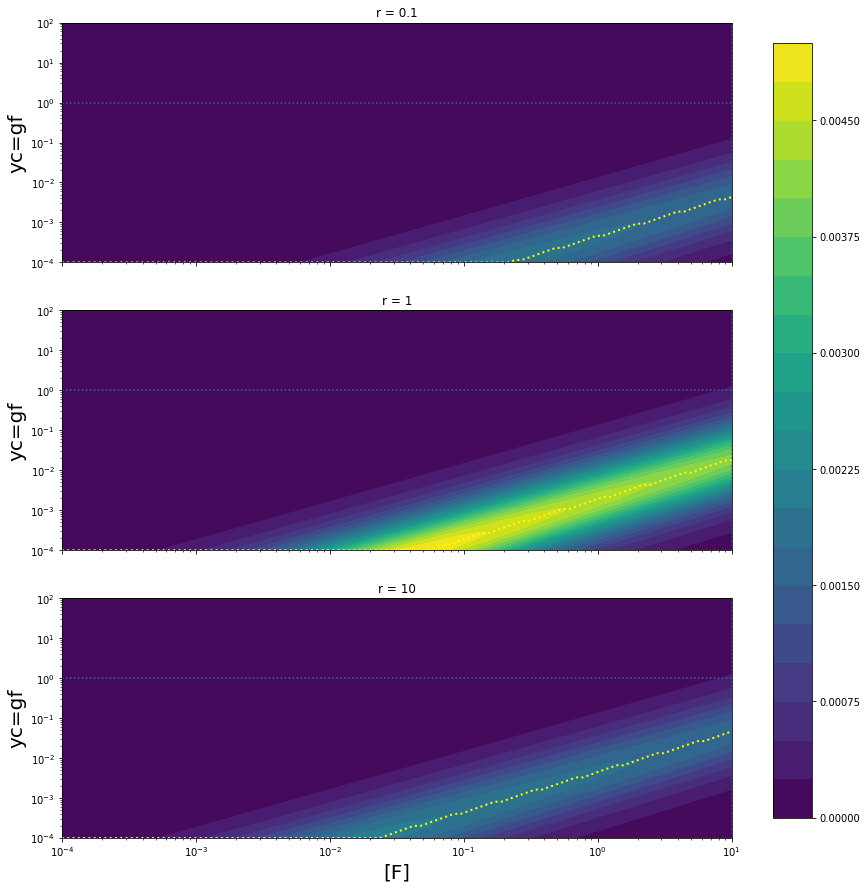

In [12]:
x=np.unique(np.geomspace(F0_min,F0_max,num))
y=np.unique(np.geomspace(sp_min,sp_max,num))

a = len(FUELINGEff)

shuttlingEff, axSE = plt.subplots(a,1, figsize=(15,15), sharex=True)

im = axSE[1].contourf(x,y,np.array(FUELINGEff[1]).reshape(len(y),len(x),order='F'),20)
axSE[2].contourf(x,y,np.array(FUELINGEff[2]).reshape(len(y),len(x),order='F'),im.levels)
axSE[0].contourf(x,y,np.array(FUELINGEff[0]).reshape(len(y),len(x),order='F'),im.levels)
axSE[2].set_xlabel('[F]', size=20)

[axSE[j].set_xscale('log') for j in range(0,a)]
[axSE[j].set_yscale('log') for j in range(0,a)]
[axSE[j].set_ylabel('yc=gf', size=20) for j in range(0,a)]
[axSE[j].set_title('r = %s'%RATIO[j])  for j in range(0,a)]
[axSE[j].axhline(y=1, c='#3465A4', linestyle=':') for j in range(0,a)]
[axSE[j].axvline(x=10, c='#3465A4', linestyle=':') for j in range(0,a)]

shuttlingEff.colorbar(im, ax=axSE.ravel().tolist(), shrink=0.95)

#plt.axvline(x=6, c='#3465A4', linestyle=':')
#asS[2].set_xscale('log')


#### ADD THE LINE WHICH MAXIMIZES SOME FUNCTION
for i in range(0,a):
    FUNCTION = np.array(FUELINGEff[i]).reshape(len(y),len(x),order='F')
    qfwfq = np.argmax(FUNCTION,axis=0)
    t_0 = []
    for j in range(0,len(qfwfq)):
        t_0.append(y[qfwfq[j]])
    axSE[i].plot(x,t_0,c='yellow',linewidth='2', linestyle=':')
####


#plt.savefig('../papero/images/Fig3/etaSA_tmp', dpi=300)

plt.show()

## Scenario 2: Varyng of $k_{+\Delta} = k'_{+\Delta}$ and ratio $\frac{k_{+\Delta}}{k_{-\Delta}} = \frac{k'_{+\Delta}}{k'_{-\Delta}}$

- energy ratchet is introduced
- different efficiencies can be studied (for the moment only the efficiecy ot the demon)
- kinetic asymmetry is affected (currents can become counterclockwise/negative)

To explore this scenario two set of 2D-plots are produced, one to study changes in the current and one for the efficiency of the motor. In both cases the absolute value of $k_{+\Delta} \, (\mathrm{yc})$ is on the x-coordinate, while the ratio r on the y-coordinate. The 4 plots in each set differ for the value of $[\mathrm{F}]$.

The blue dotted lines show experimental conditions.

![image](images/scheme_S2B.png)

In [13]:
#definition of lists (where to collect data)
SLP = []; Ratio = [];
FUELINGJ = []; FUELINGEff = []; FUEL = []; INFOFLOW = []; ERATCHET = [];
AFF = []; PH = []; PD = []; DH = []; HD = []; DD = []; HH = [];
Jf = [] ;Jw  = []; Jh  = []; Ju = []; IW = []; IF = [];
PHe = []; PDe = []; DHe = []; HDe = []; DDe = []; HHe = []; Fe = [];

#Conditions
W0 = 0.00001  ; LM = 0.01

#guess arrays for SS_solution and EQ (needed to initialize the equations solvers)
ssGuess = array([0.0001,0.0001,0.001,0.001,0.001,0.001]); 
#eqGuess = np.array([0.0000001,0.0000001,0.0025,0.0025,0.0025,0.0025, 0.000000000001])


#setting of parameters range (for a np.geomspace, where numbers are spaced evenly on log scale)
sp_min = 1e-4; sp_max = 1e2; 
rt_min = 1e-3; rt_max = 1e3;
num = 100;

#loop on the parameters: for each combination of parameters, corresponding steady-state properties are computed
for F0 in [0.003, 0.03, 0.3, 3]:
    Eff = []; Jt = []; Imh = []; ER = []; FUEL.append(F0) #lits to renew each cycles and collection of fuel values
    for ylc in np.geomspace(sp_min,sp_max,num):
        for r in np.geomspace(rt_min,rt_max,num):
            
            glc = ylc
            glf = ylc/r #sm defined accordingly o r and sp in the loop
            ylf = glf
            flp = fp 
            flm = fm 
            wlm = wm 
            wlp = wp
            ulm = um #assuming also ts to benefit from the interaction: verify consist with chem pot 
            hlp = hp 
            hlm = sqrt((hlp*flm*ylf*hlp*flm*glf)/(flp*glc*flp*ylc))
            ulp = sqrt((ulm*ylc*wlp*ulm*glc*wlp)/(glf*wlm*ylf*wlm))

            
            #call of the routines to solve rate equations
            ss = fsolve(SS_solution,ssGuess,args=(ylc,glf,glc,ylf,flp,flm,wlp,wlm,hlp,hlm,ulp,ulm,F0,W0,LM))
            ssGuess = array([ss[0],ss[1],ss[2],ss[3],ss[4],ss[5]]) 
#            eq = fsolve(EQ_solution,eqGuess,args=(slp,slm,fp,fm,wp,wm,hp,hm,W0,LM))
#            eqGuess = np.array([eq[0], eq[1], eq[2], eq[3], eq[4],eq[5],eq[6]])
            
            #affinity/force
            aff = R*T*log((flp*wlm)/(flm*wlp)) + R*T*(log(F0) - log(W0))
            
            #currents
            jss = ylc*ss[2] - glf*ss[4]
            Jt.append(jss)
            ifuel = F0*(flp*ss[4] + flp*ss[5] + hlp*ss[2] + hlp*ss[3]) - (flm+hlm)*(ss[1] + ss[0])
            
            #work
            wch = ifuel*aff
            
            #info
            imh = jss*log((ss[2]*ss[3])/(ss[4]*ss[5]))
            Imh.append(imh)
            
            #energy ratchet
            er = jss*log((ylc*glc)/(glf*ylf))
            ER.append(er)
            
            #efficiency
            if imh >= 0 and er >= 0: ncd = R*T*(imh+er)/wch 
            if imh >= 0 and er <  0: ncd = R*T*(imh)/(wch-R*T*er) 
            if imh < 0  and er >= 0: ncd = R*T*(er)/(wch-R*T*imh)  
            Eff.append(ncd)
            
    FUELINGJ.append(np.array(Jt))
    FUELINGEff.append(np.array(Eff))
    INFOFLOW.append(np.array(Imh))
    ERATCHET.append(np.array(ER))


### Effect on the current $J_\mathrm{ss}$

Note that below the horizontal black line negative values for the current are obtained.

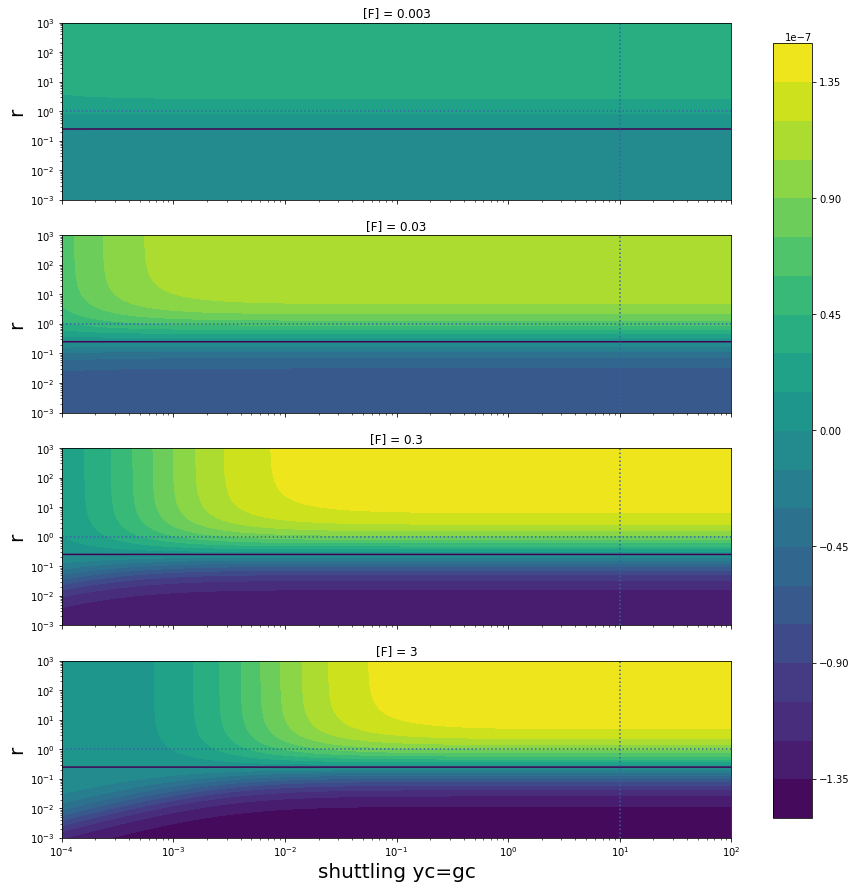

In [14]:
x=np.unique(np.geomspace(sp_min,sp_max,num))
y=np.unique(np.geomspace(rt_min,rt_max,num))

a = len(FUELINGJ)
shuttlingJ, axS = plt.subplots(a,1, figsize=(15,15), sharex=True)

im = axS[a-1].contourf(x,y,np.array(FUELINGJ[a-1]).reshape(len(y),len(x),order='F'),20)
axS[a-1].set_xlabel('shuttling yc=gc', size=20)
for i in range(0,(a-1)):
    axS[i].contourf(x,y,np.array(FUELINGJ[i]).reshape(len(y),len(x),order='F'),im.levels)

[axS[j].contour(x,y,np.array(FUELINGJ[j]).reshape(len(y),len(x),order='F'),[0.0]) for j in range(0,a)]
[axS[j].set_xscale('log') for j in range(0,a)]
[axS[j].set_yscale('log') for j in range(0,a)]
[axS[j].set_ylabel('r', size=20) for j in range(0,a)]
[axS[j].set_title('[F] = %s'%FUEL[j])  for j in range(0,a)]
[axS[j].axhline(y=1, c='#3465A4', linestyle=':') for j in range(0,a)]
[axS[j].axvline(x=10, c='#3465A4', linestyle=':') for j in range(0,a)]


shuttlingJ.colorbar(im, ax=axS.ravel().tolist(), shrink=0.95)

#plt.savefig('../papero/images/Fig3/etaSA_tmp', dpi=300)

plt.show()

### Effect on the efficiency

Note that the plots only show regions in which the motor is working in a chemical maxwell demon regime, so where the information ratchet contribution $\dot{I}$ is positive. In this region, the definition of efficiency changes depending on whether the motor is in a mixed (info- and energy-ratchet both positive) on in an energy transduction (negative energy ratchet) regime. The grey areas indicate that there the motor is only energy-driven (info-ratchet negative), with the current flowing conterclockwise in the bottom parts of the plots. (the ugly grainy effects in the plots are due to the small sampling of points I am using to keep the computation light, of course they will be improved if we decide to use them for the paper). The orange solid line shows where the information ratchet contribution is maximized for a given value of yc.



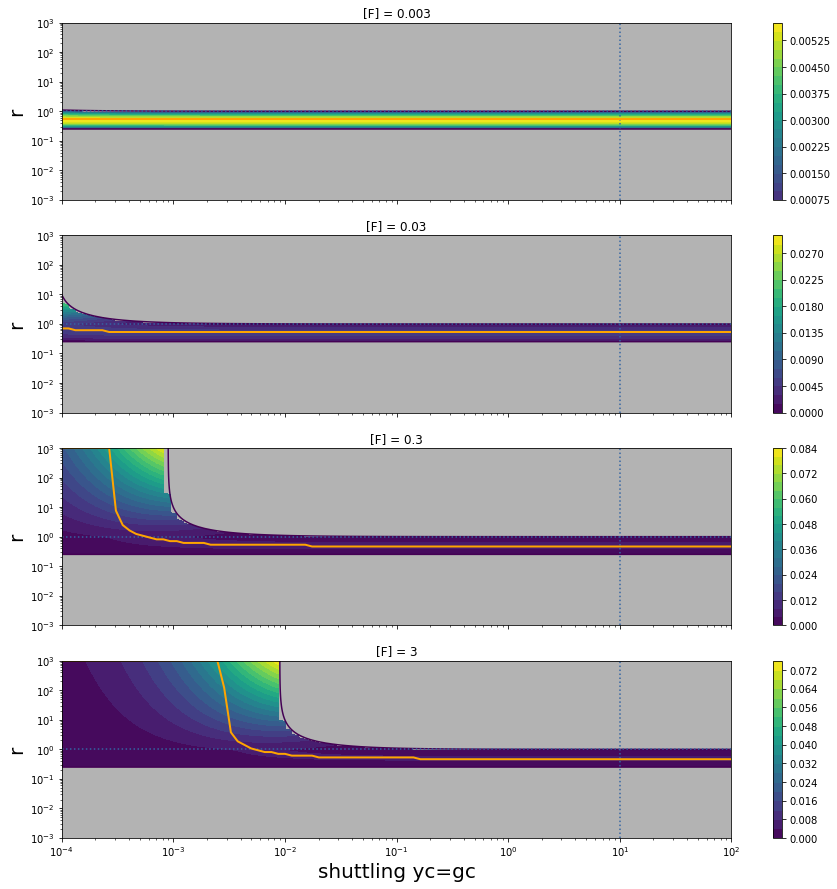

In [15]:
x=np.unique(np.geomspace(sp_min,sp_max,num))
y=np.unique(np.geomspace(rt_min,rt_max,num))

shuttlingEff, axSE = plt.subplots(a,1, figsize=(15,15), sharex=True)


#imh_mask = np.array(INFOFLOW[i]).reshape(len(y),len(x), order='F')
#eff_regime = np.array(FUELINGEff[a-1]).reshape(len(y),len(x),order='F')
#eff_regime = np.ma.array(eff_regime, mask=imh_mask < 0)
#im= axSE[a-1].contourf(x,y,eff_regime,20,vmin=0)
#axSE[a-1].set_facecolor('.7')

for i in range(0,a):
    imh_mask = np.array(INFOFLOW[i]).reshape(len(y),len(x), order='F')
    eff_regime = np.array(FUELINGEff[i]).reshape(len(y),len(x),order='F')
    eff_regime = np.ma.array(eff_regime, mask=imh_mask < 0)
    im = axSE[i].contourf(x,y,eff_regime,20, vmin=0)
    axSE[i].set_facecolor('.7')
    shuttlingEff.colorbar(im, ax=axSE[i])


[axSE[j].contour(x,y,np.array(INFOFLOW[j]).reshape(len(y),len(x),order='F'),[0.0]) for j in range(0,a)]
[axSE[j].set_xscale('log') for j in range(0,a)]
[axSE[j].set_yscale('log') for j in range(0,a)]
[axSE[j].set_ylabel('r', size=20) for j in range(0,a)]
[axSE[j].set_title('[F] = %s'%FUEL[j])  for j in range(0,a)]
[axSE[j].axhline(y=1, c='#3465A4', linestyle=':') for j in range(0,a)]
[axSE[j].axvline(x=10, c='#3465A4', linestyle=':') for j in range(0,a)]

axSE[a-1].set_xlabel('shuttling yc=gc', size=20)

#shuttlingEff.colorbar(im, ax=axSE.ravel().tolist(), shrink=0.95)

#plt.axvline(x=6, c='#3465A4', linestyle=':')
#asS[2].set_xscale('log')

#### ADD THE LINE WHICH MAXIMIZES SOME FUNCTION
for i in range(0,a):
    FUNCTION = np.array(INFOFLOW[i]).reshape(len(y),len(x),order='F')
    qfwfq = np.argmax(FUNCTION,axis=0)
    t_0 = []
    for j in range(0,len(qfwfq)):
        t_0.append(y[qfwfq[j]])
    axSE[i].plot(x,t_0,c='orange',linewidth='2')
####

##### ADD THE LINE WHICH MAXIMIZES SOME FUNCTION
#for i in range(0,a):
#    FUNCTION = np.array(ERATCHET[i]).reshape(len(y),len(x),order='F')
#    qfwfq = np.argmax(FUNCTION,axis=0)
#    t_0 = []
#    for j in range(0,len(qfwfq)):
#        t_0.append(y[qfwfq[j]])
#    axSE[i].plot(x,t_0,c='red',linewidth='2', linestyle='-')
#####


#plt.savefig('../papero/images/Fig3/etaSA_tmp', dpi=300)

plt.show()

## Efficiency when $\dot{I} < 0$

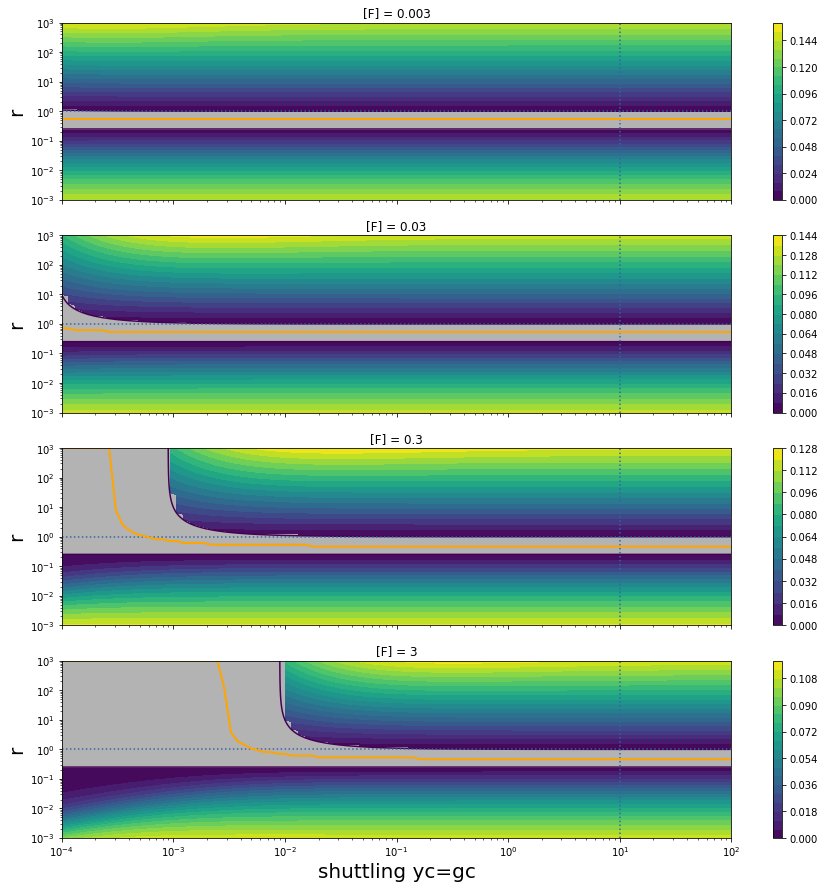

In [16]:
x=np.unique(np.geomspace(sp_min,sp_max,num))
y=np.unique(np.geomspace(rt_min,rt_max,num))

shuttlingEff, axSE = plt.subplots(a,1, figsize=(15,15), sharex=True)


#imh_mask = np.array(INFOFLOW[i]).reshape(len(y),len(x), order='F')
#eff_regime = np.array(FUELINGEff[a-1]).reshape(len(y),len(x),order='F')
#eff_regime = np.ma.array(eff_regime, mask=imh_mask > 0)
#im= axSE[a-1].contourf(x,y,eff_regime,20,vmin=0)
#axSE[a-1].set_facecolor('.7')

for i in range(0,a):
    imh_mask = np.array(INFOFLOW[i]).reshape(len(y),len(x), order='F')
    eff_regime = np.array(FUELINGEff[i]).reshape(len(y),len(x),order='F')
    eff_regime = np.ma.array(eff_regime, mask=imh_mask > 0)
    im= axSE[i].contourf(x,y,eff_regime,20,vmin=0)
    axSE[i].set_facecolor('.7')
    shuttlingEff.colorbar(im, ax=axSE[i])


[axSE[j].contour(x,y,np.array(INFOFLOW[j]).reshape(len(y),len(x),order='F'),[0.0]) for j in range(0,a)]
[axSE[j].set_xscale('log') for j in range(0,a)]
[axSE[j].set_yscale('log') for j in range(0,a)]
[axSE[j].set_ylabel('r', size=20) for j in range(0,a)]
[axSE[j].set_title('[F] = %s'%FUEL[j])  for j in range(0,a)]
[axSE[j].axhline(y=1, c='#3465A4', linestyle=':') for j in range(0,a)]
[axSE[j].axvline(x=10, c='#3465A4', linestyle=':') for j in range(0,a)]

axSE[a-1].set_xlabel('shuttling yc=gc', size=20)

#shuttlingEff.colorbar(im, ax=axSE.ravel().tolist(), shrink=0.95)

#plt.axvline(x=6, c='#3465A4', linestyle=':')
#asS[2].set_xscale('log')

#### ADD THE LINE WHICH MAXIMIZES SOME FUNCTION
for i in range(0,a):
    FUNCTION = np.array(INFOFLOW[i]).reshape(len(y),len(x),order='F')
    qfwfq = np.argmax(FUNCTION,axis=0)
    t_0 = []
    for j in range(0,len(qfwfq)):
        t_0.append(y[qfwfq[j]])
    axSE[i].plot(x,t_0,c='orange',linewidth='2')
####

##### ADD THE LINE WHICH MAXIMIZES SOME FUNCTION
#for i in range(0,a):
#    FUNCTION = np.array(ERATCHET[i]).reshape(len(y),len(x),order='F')
#    qfwfq = np.argmax(FUNCTION,axis=0)
#    t_0 = []
#    for j in range(0,len(qfwfq)):
#        t_0.append(y[qfwfq[j]])
#    axSE[i].plot(x,t_0,c='red',linewidth='2', linestyle='-')
#####


#plt.savefig('../papero/images/Fig3/etaSA_tmp', dpi=300)

plt.show()

## Scenario 2a - "Astumian friendly"


![image](images/scheme_S2A.png)

In [17]:
#definition of lists (where to collect data)
SLP = []; Ratio = [];
FUELINGJ = []; FUELINGEff = []; FUEL = []; INFOFLOW = []; ERATCHET = [];
AFF = []; PH = []; PD = []; DH = []; HD = []; DD = []; HH = [];
Jf = [] ;Jw  = []; Jh  = []; Ju = []; IW = []; IF = [];
PHe = []; PDe = []; DHe = []; HDe = []; DDe = []; HHe = []; Fe = [];

#Conditions
W0 = 0.00001  ; LM = 0.01

#guess arrays for SS_solution and EQ (needed to initialize the equations solvers)
ssGuess = array([0.0001,0.0001,0.001,0.001,0.001,0.001]); 
#eqGuess = np.array([0.0000001,0.0000001,0.0025,0.0025,0.0025,0.0025, 0.000000000001])


#setting of parameters range (for a np.geomspace, where numbers are spaced evenly on log scale)
sp_min = 1e-4; sp_max = 1e2; 
rt_min = 1e-3; rt_max = 1e3;
num = 100;

#loop on the parameters: for each combination of parameters, corresponding steady-state properties are computed
for F0 in [0.003, 0.03, 0.3, 3]:
    Eff = []; Jt = []; Imh = []; ER = []; FUEL.append(F0) #lits to renew each cycles and collection of fuel values
    for ylc in np.geomspace(sp_min,sp_max,num):
        for r in np.geomspace(rt_min,rt_max,num):
            
            glc = ylc
            glf = ylc/r #sm defined accordingly o r and sp in the loop
            ylf = glf
            flp = fp 
            flm = fm 
            wlm = wm 
            wlp = wp
            ulm = um #assuming also ts to benefit from the interaction: verify consist with chem pot 
            hlm = hm 
            hlp = sqrt((hlm*flp*glc*hlm*flp*ylc)/(flm*ylf*flm*glf))
            ulp = sqrt((ulm*ylc*wlp*ulm*glc*wlp)/(glf*wlm*ylf*wlm))

            
            #call of the routines to solve rate equations
            ss = fsolve(SS_solution,ssGuess,args=(ylc,glf,glc,ylf,flp,flm,wlp,wlm,hlp,hlm,ulp,ulm,F0,W0,LM))
            ssGuess = array([ss[0],ss[1],ss[2],ss[3],ss[4],ss[5]]) 
#            eq = fsolve(EQ_solution,eqGuess,args=(slp,slm,fp,fm,wp,wm,hp,hm,W0,LM))
#            eqGuess = np.array([eq[0], eq[1], eq[2], eq[3], eq[4],eq[5],eq[6]])
            
            #affinity/force
            aff = R*T*log((flp*wlm)/(flm*wlp)) + R*T*(log(F0) - log(W0))
            
            #currents
            jss = ylc*ss[2] - glf*ss[4]
            Jt.append(jss)
            ifuel = F0*(flp*ss[4] + flp*ss[5] + hlp*ss[2] + hlp*ss[3]) - (flm+hlm)*(ss[1] + ss[0])
            
            #work
            wch = ifuel*aff
            
            #info
            imh = jss*log((ss[2]*ss[3])/(ss[4]*ss[5]))
            Imh.append(imh)
            
            #energy ratchet
            er = jss*log((ylc*glc)/(glf*ylf))
            ER.append(er)
            
            #efficiency
            if imh >= 0 and er >= 0: ncd = R*T*(imh+er)/wch 
            if imh >= 0 and er <  0: ncd = R*T*(imh)/(wch-R*T*er) 
            if imh < 0  and er >= 0: ncd = R*T*(er)/(wch-R*T*imh)  
            Eff.append(ncd)
            
    FUELINGJ.append(np.array(Jt))
    FUELINGEff.append(np.array(Eff))
    INFOFLOW.append(np.array(Imh))
    ERATCHET.append(np.array(ER))


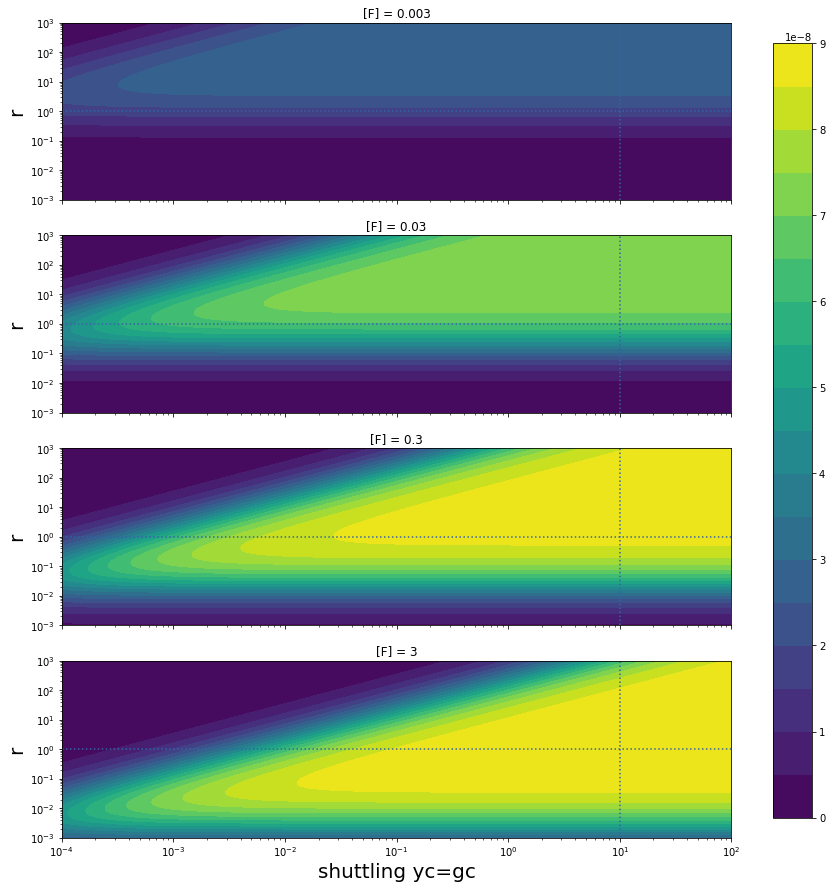

In [18]:
x=np.unique(np.geomspace(sp_min,sp_max,num))
y=np.unique(np.geomspace(rt_min,rt_max,num))

a = len(FUELINGJ)
shuttlingJ, axS = plt.subplots(a,1, figsize=(15,15), sharex=True)

im = axS[a-1].contourf(x,y,np.array(FUELINGJ[a-1]).reshape(len(y),len(x),order='F'),20)
axS[a-1].set_xlabel('shuttling yc=gc', size=20)
for i in range(0,(a-1)):
    axS[i].contourf(x,y,np.array(FUELINGJ[i]).reshape(len(y),len(x),order='F'),im.levels)

#[axS[j].contour(x,y,np.array(FUELINGJ[j]).reshape(len(y),len(x),order='F'),[0.0]) for j in range(0,a)]
[axS[j].set_xscale('log') for j in range(0,a)]
[axS[j].set_yscale('log') for j in range(0,a)]
[axS[j].set_ylabel('r', size=20) for j in range(0,a)]
[axS[j].set_title('[F] = %s'%FUEL[j])  for j in range(0,a)]
[axS[j].axhline(y=1, c='#3465A4', linestyle=':') for j in range(0,a)]
[axS[j].axvline(x=10, c='#3465A4', linestyle=':') for j in range(0,a)]


shuttlingJ.colorbar(im, ax=axS.ravel().tolist(), shrink=0.95)

#plt.savefig('../papero/images/Fig3/etaSA_tmp', dpi=300)

plt.show()

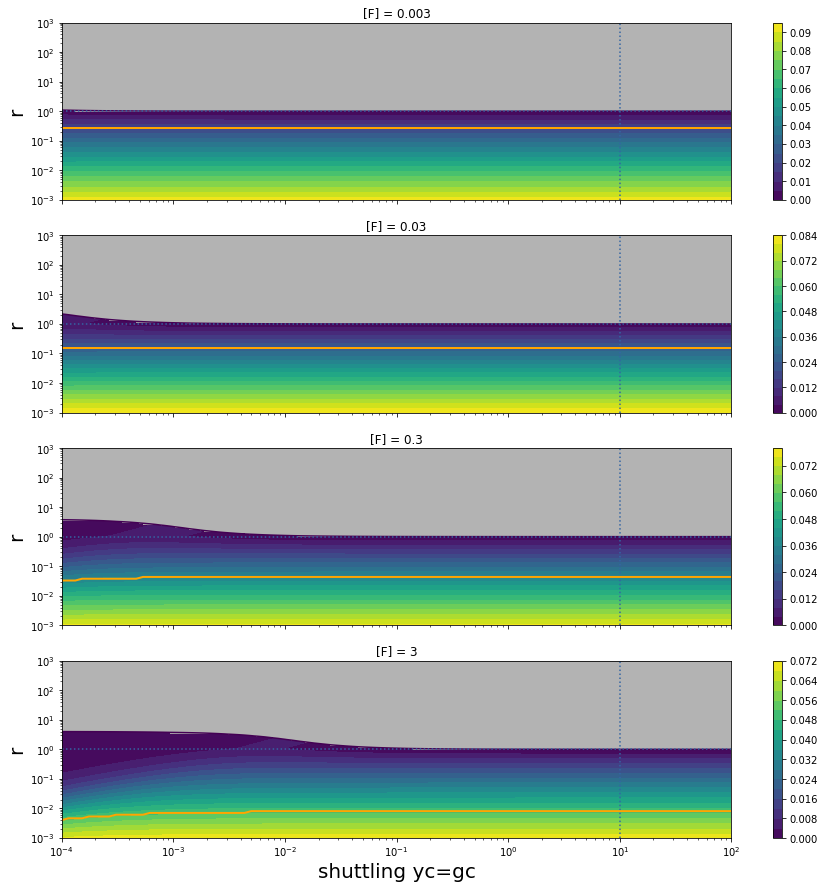

In [19]:
x=np.unique(np.geomspace(sp_min,sp_max,num))
y=np.unique(np.geomspace(rt_min,rt_max,num))

shuttlingEff, axSE = plt.subplots(a,1, figsize=(15,15), sharex=True)

#imh_mask = np.array(INFOFLOW[0]).reshape(len(y),len(x), order='F')
#eff_regime = np.array(FUELINGEff[0]).reshape(len(y),len(x),order='F')
#eff_regime = np.ma.array(eff_regime, mask=imh_mask < 0)
#im = axSE[0].contourf(x,y,eff_regime,8,vmin=0.0)
#axSE[0].set_facecolor('.7')


for i in range(0,a):
    imh_mask = np.array(INFOFLOW[i]).reshape(len(y),len(x), order='F')
    eff_regime = np.array(FUELINGEff[i]).reshape(len(y),len(x),order='F')
    eff_regime = np.ma.array(eff_regime, mask=imh_mask < 0)
    im = axSE[i].contourf(x,y,eff_regime,20, vmin=0.0)
    axSE[i].set_facecolor('.7')
    shuttlingEff.colorbar(im, ax=axSE[i])


#im = axSE[2].contourf(x,y,np.array(FUELINGEff[2]).reshape(len(y),len(x),order='F'),20)
#axSE[0].contourf(x,y,np.array(FUELINGEff[0]).reshape(len(y),len(x),order='F'),im.levels)
#axSE[1].contourf(x,y,np.array(FUELINGEff[1]).reshape(len(y),len(x),order='F'),im.levels)
#axSE[3].contourf(x,y,np.array(FUELINGEff[3]).reshape(len(y),len(x),order='F'),im.levels)
#axSE[3].set_xlabel('shuttling c-> f', size=20)

[axSE[j].contour(x,y,np.array(INFOFLOW[j]).reshape(len(y),len(x),order='F'),[0.0]) for j in range(0,a)]
[axSE[j].set_xscale('log') for j in range(0,a)]
[axSE[j].set_yscale('log') for j in range(0,a)]
[axSE[j].set_ylabel('r', size=20) for j in range(0,a)]
[axSE[j].set_title('[F] = %s'%FUEL[j])  for j in range(0,a)]
[axSE[j].axhline(y=1, c='#3465A4', linestyle=':') for j in range(0,a)]
[axSE[j].axvline(x=10, c='#3465A4', linestyle=':') for j in range(0,a)]

axSE[a-1].set_xlabel('shuttling yc=gc', size=20)

#shuttlingEff.colorbar(im, ax=axSE.ravel().tolist(), shrink=0.95)


#plt.axvline(x=6, c='#3465A4', linestyle=':')
#asS[2].set_xscale('log')

#### ADD THE LINE WHICH MAXIMIZES SOME FUNCTION
for i in range(0,a):
    FUNCTION = np.array(INFOFLOW[i]).reshape(len(y),len(x),order='F')
    qfwfq = np.argmax(FUNCTION,axis=0)
    t_0 = []
    for j in range(0,len(qfwfq)):
        t_0.append(y[qfwfq[j]])
    axSE[i].plot(x,t_0,c='orange',linewidth='2')
####

##### ADD THE LINE WHICH MAXIMIZES SOME FUNCTION
#for i in range(0,a):
#    FUNCTION = np.array(ERATCHET[i]).reshape(len(y),len(x),order='F')
#    qfwfq = np.argmax(FUNCTION,axis=0)
#    t_0 = []
#    for j in range(0,len(qfwfq)):
#        t_0.append(y[qfwfq[j]])
#    axSE[i].plot(x,t_0,c='red',linewidth='2', linestyle='-')
#####


#plt.savefig('../papero/images/Fig3/etaSA_tmp', dpi=300)

plt.show()

## Varyng of $k_{+\mathrm{F}}$ and ratio $\frac{k_{+\mathrm{F}}}{k^\mathrm{h}_{+\mathrm{F}}}$

- no energy ratchet introduced
- same definition of efficiency as in the notes
- kinetic asymmetry is affected and the current may be reversed

To explore this scenario two set of 2D-plots are produced, one to study changes in the current and one for the efficiency of the motor. In both cases the absolute value of $k_{+\mathrm{F}} \, (\mathrm{fp})$ is on the x-coordinate, while the ratio r of $\frac{k_{+\mathrm{F}}}{k^\mathrm{h}_{+\mathrm{F}}}$ on the y-coordinate. The 4 plots in each set differ for the value of $[\mathrm{F}]$.

The blue dotted lines show experimental conditions. The white solid line indicates the set of point at zero current.

In [20]:
#definition of lists (where to collect data)
SLP = []; Ratio = [];
FUELINGJ = []; FUELINGEff = []; FUEL = []; INFOFLOW = []; ERATCHET = [];
AFF = []; PH = []; PD = []; DH = []; HD = []; DD = []; HH = [];
Jf = [] ;Jw  = []; Jh  = []; Ju = []; IW = []; IF = [];
PHe = []; PDe = []; DHe = []; HDe = []; DDe = []; HHe = []; Fe = [];

#Conditions
W0 = 0.00001  ; LM = 0.01

#guess arrays for SS_solution and EQ (needed to initialize the equations solvers)
ssGuess = array([0.0001,0.0001,0.001,0.001,0.001,0.001]); 
#eqGuess = np.array([0.0000001,0.0000001,0.0025,0.0025,0.0025,0.0025, 0.000000000001])


#setting of parameters range (for a np.geomspace, where numbers are spaced evenly on log scale)
fp_min = 1e-3; fp_max = 1e2; 
rt_min = 1e-3; rt_max = 1e3;
num = 100;

#loop on the parameters: for each combination of parameters, corresponding steady-state properties are computed
for F0 in [0.003, 0.03, 0.3, 3]:
    Eff = []; Jt = []; Imh = []; ER = []; FUEL.append(F0) #lits to renew each cycles and collection of fuel values
    for flp in np.geomspace(fp_min,fp_max,num):
        for r in np.geomspace(rt_min,rt_max,num):
            
            ylc = yc 
            glc = gc
            glf = gf
            ylf = yf
            flm = fm*(flp/fp) #assuming that the modification only affects the barriers 
            wlm = wm 
            wlp = wp
            ulm = um 
            hlp = flp/r 
            hlm = sqrt((hlp*flm*ylf*hlp*flm*glf)/(flp*glc*flp*ylc))
            ulp = sqrt((ulm*ylc*wlp*ulm*glc*wlp)/(glf*wlm*ylf*wlm))

            
            #call of the routines to solve rate equations
            ss = fsolve(SS_solution,ssGuess,args=(ylc,glf,glc,ylf,flp,flm,wlp,wlm,hlp,hlm,ulp,ulm,F0,W0,LM))
            ssGuess = array([ss[0],ss[1],ss[2],ss[3],ss[4],ss[5]]) 
#            eq = fsolve(EQ_solution,eqGuess,args=(slp,slm,fp,fm,wp,wm,hp,hm,W0,LM))
#            eqGuess = np.array([eq[0], eq[1], eq[2], eq[3], eq[4],eq[5],eq[6]])
            
            #affinity/force
            aff = R*T*log((flp*wlm)/(flm*wlp)) + R*T*(log(F0) - log(W0))
            
            #currents
            jss = ylc*ss[2] - glf*ss[4]
            Jt.append(jss)
            ifuel = F0*(flp*ss[4] + flp*ss[5] + hlp*ss[2] + hlp*ss[3]) - (flm+hlm)*(ss[1] + ss[0])
            
            #work
            wch = ifuel*aff
            
            #info
            imh = jss*log((ss[2]*ss[3])/(ss[4]*ss[5]))
            Imh.append(imh)
            
            #energy ratchet
            er = jss*log((ylc*glc)/(glf*ylf))
            ER.append(er)
            
            #efficiency
            if imh >= 0 and er >= 0: ncd = R*T*(imh+er)/wch 
            if imh >= 0 and er <  0: ncd = R*T*(imh)/(wch-R*T*er) 
            if imh < 0  and er >= 0: ncd = R*T*(er)/(wch-R*T*imh)  
            Eff.append(ncd)
            
    FUELINGJ.append(np.array(Jt))
    FUELINGEff.append(np.array(Eff))
    INFOFLOW.append(np.array(Imh))
    ERATCHET.append(np.array(ER))

### Effect on the current $J_\mathrm{ss}$

Since no energy ratchet is introduced here, $J_\mathrm{ss} = 0$ is realized when $\frac{k_{+\mathrm{F}}}{k^\mathrm{h}_{+\mathrm{F}}} = 1$. 

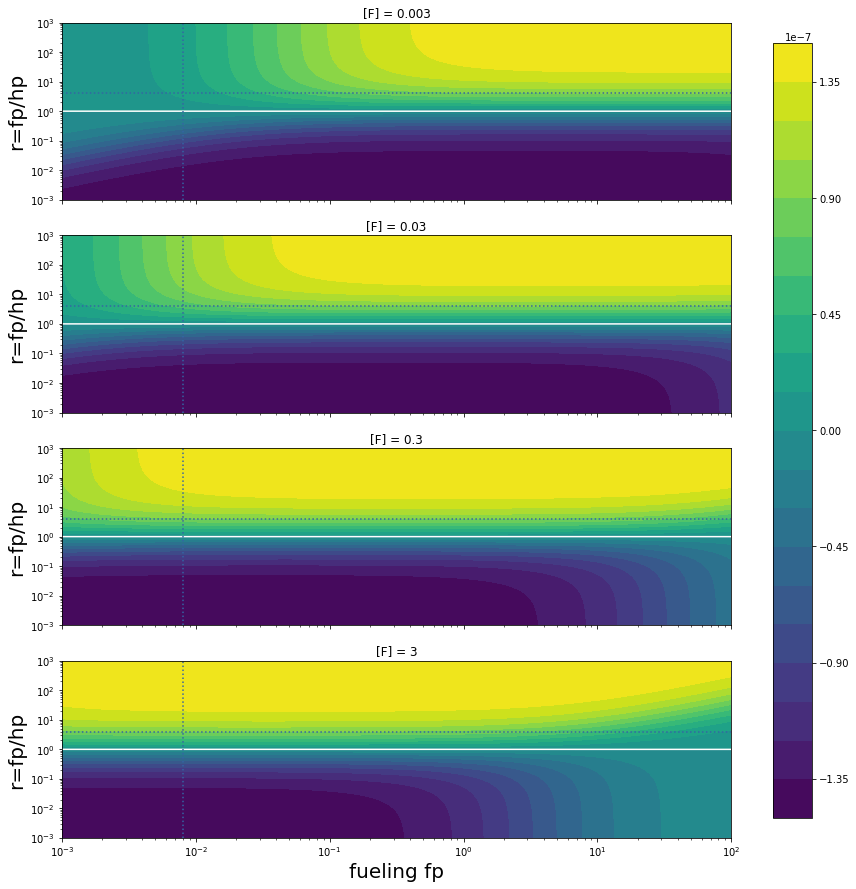

In [21]:
x=np.unique(np.geomspace(fp_min,fp_max,num))
y=np.unique(np.geomspace(rt_min,rt_max,num))

a = len(FUELINGJ)
fuelingJ, axF = plt.subplots(a,1, figsize=(15,15), sharex=True)

im = axF[a-1].contourf(x,y,np.array(FUELINGJ[a-1]).reshape(len(y),len(x),order='F'),20)
axF[a-1].set_xlabel('fueling fp', size=20)
for i in range(0,(a-1)):
    axF[i].contourf(x,y,np.array(FUELINGJ[i]).reshape(len(y),len(x),order='F'),im.levels)

[axF[j].contour(x,y,np.array(FUELINGJ[j]).reshape(len(y),len(x),order='F'),[0.0], colors='w') for j in range(0,a)]
[axF[j].set_xscale('log') for j in range(0,a)]
[axF[j].set_yscale('log') for j in range(0,a)]
[axF[j].set_ylabel('r=fp/hp', size=20) for j in range(0,a)]
[axF[j].set_title('[F] = %s'%FUEL[j])  for j in range(0,a)]
[axF[j].axhline(y=fp/hp, c='#3465A4', linestyle=':') for j in range(0,a)]
[axF[j].axvline(x=fp, c='#3465A4', linestyle=':') for j in range(0,a)]


fuelingJ.colorbar(im, ax=axF.ravel().tolist(), shrink=0.95)

#plt.savefig('../papero/images/Fig3/etaSA_tmp', dpi=300)

plt.show()

### Effect on the efficiency

Since no energy ratchet is introduced here, the motor only has information-driven regimes. Note that two regions of higher efficiencies appear, one for the clockwise current and one for the counterclockwise.  

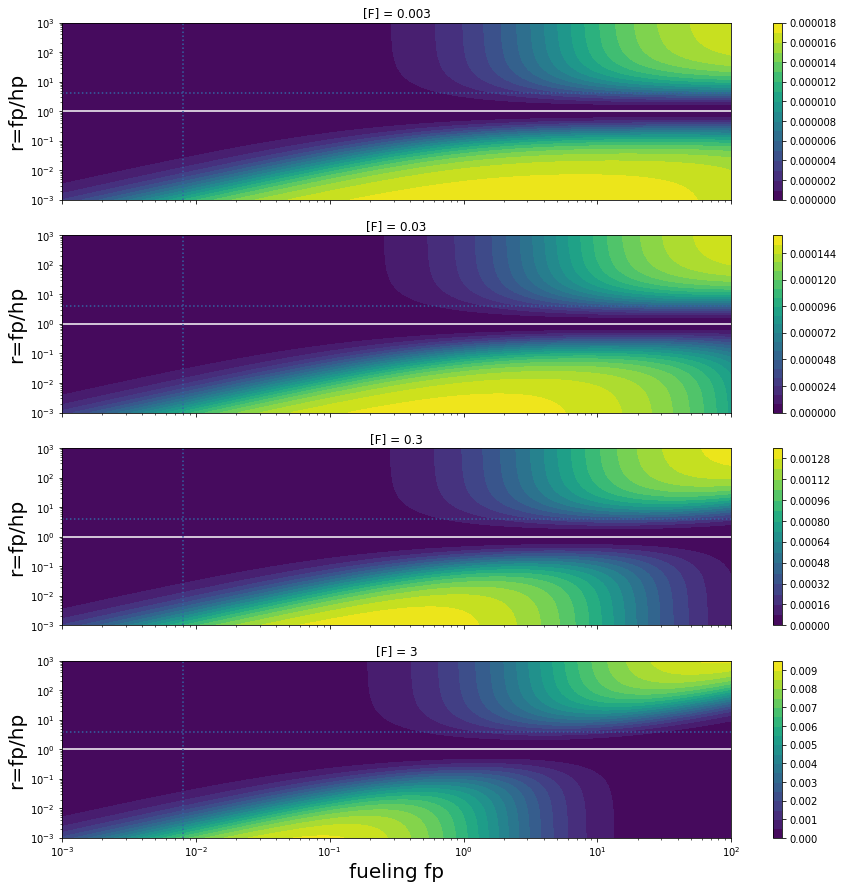

In [22]:
x=np.unique(np.geomspace(fp_min,fp_max,num))
y=np.unique(np.geomspace(rt_min,rt_max,num))

fuelingEff, axFE = plt.subplots(a,1, figsize=(15,15), sharex=True)

for i in range(0,a):
    im = axFE[i].contourf(x,y,np.array(FUELINGEff[i]).reshape(len(y),len(x),order='F'),20)
    fuelingEff.colorbar(im, ax=axFE[i])


#[axFE[j].contour(x,y,np.array(INFOFLOW[j]).reshape(len(y),len(x),order='F'),[0.0]) for j in range(0,a)]
[axFE[j].set_xscale('log') for j in range(0,a)]
[axFE[j].set_yscale('log') for j in range(0,a)]
[axFE[j].set_ylabel('r=fp/hp', size=20) for j in range(0,a)]
[axFE[j].set_title('[F] = %s'%FUEL[j])  for j in range(0,a)]
[axFE[j].axhline(y=1, c='w', linestyle='-') for j in range(0,a)]
[axFE[j].axhline(y=fp/hp, c='#3465A4', linestyle=':') for j in range(0,a)]
[axFE[j].axvline(x=fp, c='#3465A4', linestyle=':') for j in range(0,a)]

axFE[a-1].set_xlabel('fueling fp', size=20)

#fuelingEff.colorbar(im, ax=axFE.ravel().tolist(), shrink=0.95)

#plt.axvline(x=6, c='#3465A4', linestyle=':')
#asS[2].set_xscale('log')

##### ADD THE LINE WHICH MAXIMIZES SOME FUNCTION
#for i in range(0,a):
#    FUNCTION = np.array(INFOFLOW[i]).reshape(len(y),len(x),order='F')
#    qfwfq = np.argmax(FUNCTION,axis=0)
#    t_0 = []
#    for j in range(0,len(qfwfq)):
#        t_0.append(y[qfwfq[j]])
#    axFE[i].plot(x,t_0,c='orange',linewidth='2')
#####
#
##### ADD THE LINE WHICH MAXIMIZES SOME FUNCTION
#for i in range(0,a):
#    FUNCTION = np.array(FUELINGJ[i]).reshape(len(y),len(x),order='F')
#    qfwfq = np.argmax(FUNCTION,axis=0)
#    t_0 = []
#    for j in range(0,len(qfwfq)):
#        t_0.append(y[qfwfq[j]])
#    axFE[i].plot(x,t_0,c='red',linewidth='2', linestyle='-')
#####


#plt.savefig('../papero/images/Fig3/etaSA_tmp', dpi=300)

plt.show()

## Varyng of $k_{-\mathrm{W}}$ and ratio $\frac{k_{-\mathrm{W}}}{k^\mathrm{h}_{-\mathrm{W}}}$

- no energy ratcheting introduced
- same definition of efficiency as in the notes
- kinetic asymmetry is affected and the current may be reversed

To explore this scenario two set of 2D-plots are produced, one to study changes in the current and one for the efficiency of the motor. In both cases the absolute value of $k_{-\mathrm{W}} \, (\mathrm{wm})$ is on the x-coordinate, while the ratio r of $\frac{k_{-\mathrm{W}}}{k^\mathrm{h}_{-\mathrm{W}}}$ on the y-coordinate. The 4 plots in each set differ for the value of $[\mathrm{F}]$.

The blue dotted lines show experimental conditions. The white solid line indicates the set of point at zero current.

In [23]:
#definition of lists (where to collect data)
SLP = []; Ratio = [];
FUELINGJ = []; FUELINGEff = []; FUEL = []; INFOFLOW = []; ERATCHET = [];
AFF = []; PH = []; PD = []; DH = []; HD = []; DD = []; HH = [];
Jf = [] ;Jw  = []; Jh  = []; Ju = []; IW = []; IF = [];
PHe = []; PDe = []; DHe = []; HDe = []; DDe = []; HHe = []; Fe = [];

#Conditions
W0 = 0.00001  ; LM = 0.01

#guess arrays for SS_solution and EQ (needed to initialize the equations solvers)
ssGuess = array([0.0001,0.0001,0.001,0.001,0.001,0.001]); 
#eqGuess = np.array([0.0000001,0.0000001,0.0025,0.0025,0.0025,0.0025, 0.000000000001])


#setting of parameters range (for a np.geomspace, where numbers are spaced evenly on log scale)
wm_min = 1e-7; wm_max = 1e-2; 
rt_min = 1e-3; rt_max = 1e3;
num = 100;

#loop on the parameters: for each combination of parameters, corresponding steady-state properties are computed
for F0 in [0.003, 0.03, 0.3, 3]:
    Eff = []; Jt = []; Imh = []; ER = []; FUEL.append(F0) #lits to renew each cycles and collection of fuel values
    for wlm in np.geomspace(fp_min,fp_max,num):
        for r in np.geomspace(rt_min,rt_max,num):
            
            ylc = yc 
            glc = gc
            glf = gf
            ylf = yf
            wlp = wp*(wlm/wm) #assuming that the modification only affects the barriers 
            flp = fp 
            flm = fm
            ulm = wlm/r 
            hlp = hp 
            hlm = sqrt((hlp*flm*ylf*hlp*flm*glf)/(flp*glc*flp*ylc))
            ulp = sqrt((ulm*ylc*wlp*ulm*glc*wlp)/(glf*wlm*ylf*wlm))

            
            #call of the routines to solve rate equations
            ss = fsolve(SS_solution,ssGuess,args=(ylc,glf,glc,ylf,flp,flm,wlp,wlm,hlp,hlm,ulp,ulm,F0,W0,LM))
            ssGuess = array([ss[0],ss[1],ss[2],ss[3],ss[4],ss[5]]) 
#            eq = fsolve(EQ_solution,eqGuess,args=(slp,slm,fp,fm,wp,wm,hp,hm,W0,LM))
#            eqGuess = np.array([eq[0], eq[1], eq[2], eq[3], eq[4],eq[5],eq[6]])
            
            #affinity/force
            aff = R*T*log((flp*wlm)/(flm*wlp)) + R*T*(log(F0) - log(W0))
            
            #currents
            jss = ylc*ss[2] - glf*ss[4]
            Jt.append(jss)
            ifuel = F0*(flp*ss[4] + flp*ss[5] + hlp*ss[2] + hlp*ss[3]) - (flm+hlm)*(ss[1] + ss[0])
            
            #work
            wch = ifuel*aff
            
            #info
            imh = jss*log((ss[2]*ss[3])/(ss[4]*ss[5]))
            Imh.append(imh)
            
            #energy ratchet
            er = jss*log((ylc*glc)/(glf*ylf))
            ER.append(er)
            
            #efficiency
            if imh >= 0 and er >= 0: ncd = R*T*(imh+er)/wch 
            if imh >= 0 and er <  0: ncd = R*T*(imh)/(wch-R*T*er) 
            if imh < 0  and er >= 0: ncd = R*T*(er)/(wch-R*T*imh)  
            Eff.append(ncd)
            
    FUELINGJ.append(np.array(Jt))
    FUELINGEff.append(np.array(Eff))
    INFOFLOW.append(np.array(Imh))
    ERATCHET.append(np.array(ER))

### Effect on the current $J_\mathrm{ss}$

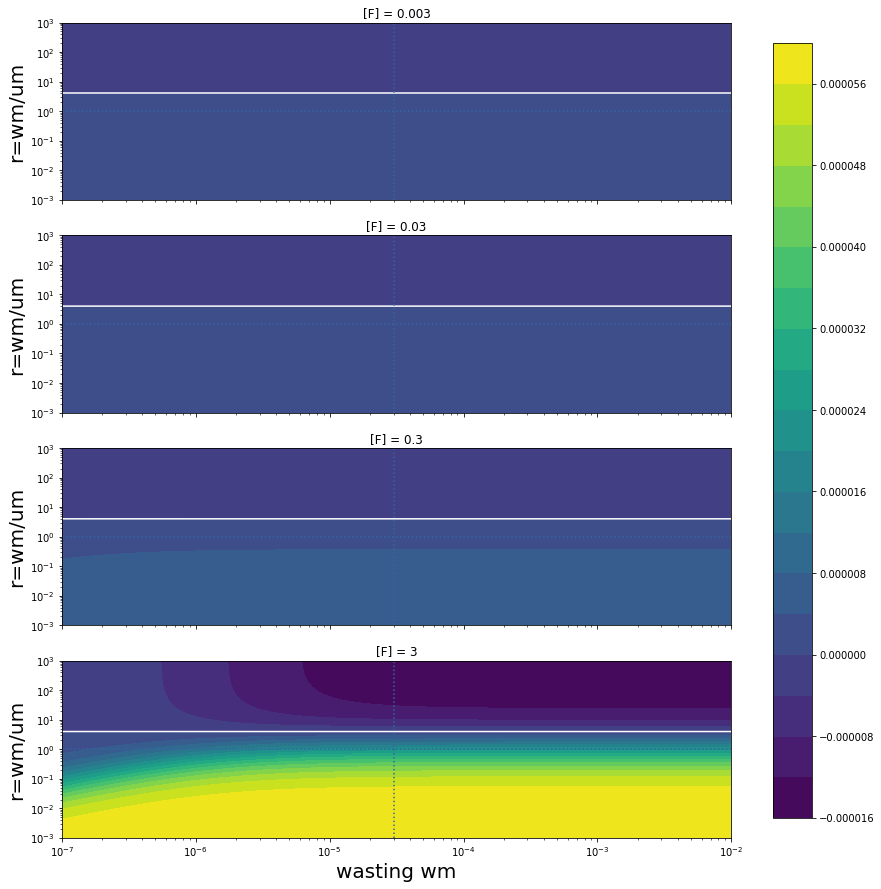

In [24]:
x=np.unique(np.geomspace(wm_min,wm_max,num))
y=np.unique(np.geomspace(rt_min,rt_max,num))

a = len(FUELINGJ)
wastingJ, axW = plt.subplots(a,1, figsize=(15,15), sharex=True)

im = axW[a-1].contourf(x,y,np.array(FUELINGJ[a-1]).reshape(len(y),len(x),order='F'),20)
axW[a-1].set_xlabel('wasting wm', size=20)
for i in range(0,(a-1)):
    axW[i].contourf(x,y,np.array(FUELINGJ[i]).reshape(len(y),len(x),order='F'),im.levels)

[axW[j].contour(x,y,np.array(FUELINGJ[j]).reshape(len(y),len(x),order='F'),[0.0], colors='w') for j in range(0,a)]
[axW[j].set_xscale('log') for j in range(0,a)]
[axW[j].set_yscale('log') for j in range(0,a)]
[axW[j].set_ylabel('r=wm/um', size=20) for j in range(0,a)]
[axW[j].set_title('[F] = %s'%FUEL[j])  for j in range(0,a)]
[axW[j].axhline(y=wm/um, c='#3465A4', linestyle=':') for j in range(0,a)]
[axW[j].axvline(x=wm, c='#3465A4', linestyle=':') for j in range(0,a)]


wastingJ.colorbar(im, ax=axW.ravel().tolist(), shrink=0.95)

#plt.savefig('../papero/images/Fig3/etaSA_tmp', dpi=300)

plt.show()

### Effect on the efficiency

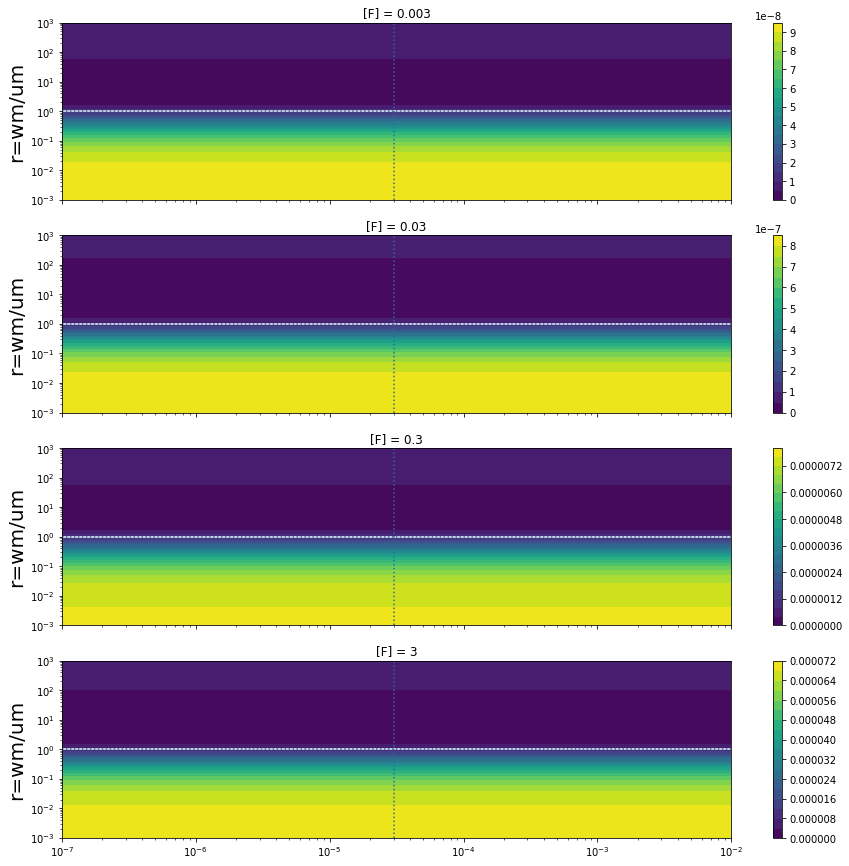

In [25]:
x=np.unique(np.geomspace(wm_min,wm_max,num))
y=np.unique(np.geomspace(rt_min,rt_max,num))

wastingEff, axWE = plt.subplots(a,1, figsize=(15,15), sharex=True)

for i in range(0,a):
    im = axWE[i].contourf(x,y,np.array(FUELINGEff[i]).reshape(len(y),len(x),order='F'),20)
    wastingEff.colorbar(im, ax=axWE[i])

#[axFE[j].contour(x,y,np.array(INFOFLOW[j]).reshape(len(y),len(x),order='F'),[0.0]) for j in range(0,a)]
[axWE[j].set_xscale('log') for j in range(0,a)]
[axWE[j].set_yscale('log') for j in range(0,a)]
[axWE[j].set_ylabel('r=wm/um', size=20) for j in range(0,a)]
[axWE[j].set_title('[F] = %s'%FUEL[j])  for j in range(0,a)]
[axWE[j].axhline(y=1, c='w', linestyle='-') for j in range(0,a)]
[axWE[j].axhline(y=wm/um, c='#3465A4', linestyle=':') for j in range(0,a)]
[axWE[j].axvline(x=wm, c='#3465A4', linestyle=':') for j in range(0,a)]

axFE[a-1].set_xlabel('wasting wm', size=20)

#wastingEff.colorbar(im, ax=axWE.ravel().tolist(), shrink=0.95)

#plt.axvline(x=6, c='#3465A4', linestyle=':')
#asS[2].set_xscale('log')

##### ADD THE LINE WHICH MAXIMIZES SOME FUNCTION
#for i in range(0,a):
#    FUNCTION = np.array(INFOFLOW[i]).reshape(len(y),len(x),order='F')
#    qfwfq = np.argmax(FUNCTION,axis=0)
#    t_0 = []
#    for j in range(0,len(qfwfq)):
#        t_0.append(y[qfwfq[j]])
#    axFE[i].plot(x,t_0,c='orange',linewidth='2')
#####
#
##### ADD THE LINE WHICH MAXIMIZES SOME FUNCTION
#for i in range(0,a):
#    FUNCTION = np.array(FUELINGJ[i]).reshape(len(y),len(x),order='F')
#    qfwfq = np.argmax(FUNCTION,axis=0)
#    t_0 = []
#    for j in range(0,len(qfwfq)):
#        t_0.append(y[qfwfq[j]])
#    axFE[i].plot(x,t_0,c='red',linewidth='2', linestyle='-')
#####


#plt.savefig('../papero/images/Fig3/etaSA_tmp', dpi=300)

plt.show()